/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


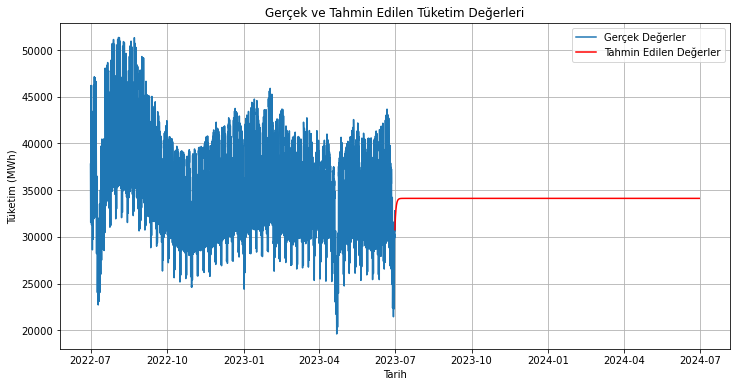

In [1]:

# AR MODEL # 
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Veri setini yükle
veri_seti = pd.read_excel("/Users/salihauludogan/Desktop/adsız klasör/Hourly_Turkey_Electricity_Consumption_Dataset_2016_2023.xlsx")

# Tarih ve saat sütunlarını birleştir ve datetime sütunu oluştur
veri_seti['Datetime'] = pd.to_datetime(veri_seti['date'].astype(str) + ' ' + veri_seti['hour'].astype(str))

# Tarih ve saat sütunlarını düşür
veri_seti = veri_seti.drop(['date', 'hour'], axis=1)

# Oluşturulan datetime sütununu indeks yap
veri_seti = veri_seti.set_index('Datetime')

# AR modelini oluştur
model = AutoReg(veri_seti['consumption_mwh'], lags=1)

# Modeli eğit
model_fit = model.fit()



# Gelecekteki tüketim tahminlerini yap
n = 8760  # Bir yılın (365 gün * 24 saat) tahminini alalım
tahminler = model_fit.predict(start=len(veri_seti), end=len(veri_seti)+n-1, dynamic=False)

# Tahminler ve gerçek verileri birleştir
tahminler_df = pd.DataFrame({'Tarih': pd.date_range(start=veri_seti.index[-1], periods=n+1, freq='H')[1:], 'Tahmin Edilen Tüketim (MWh)': tahminler.values})
tahminler_df.set_index('Tarih', inplace=True)
gercek_veriler = veri_seti['consumption_mwh'].tail(n)

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(gercek_veriler.index, gercek_veriler, label='Gerçek Değerler')
plt.plot(tahminler_df.index, tahminler_df['Tahmin Edilen Tüketim (MWh)'], label='Tahmin Edilen Değerler', color='red')
plt.xlabel('Tarih')
plt.ylabel('Tüketim (MWh)')
plt.title('Gerçek ve Tahmin Edilen Tüketim Değerleri')
plt.legend()
plt.grid(True)
plt.show()





/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/an

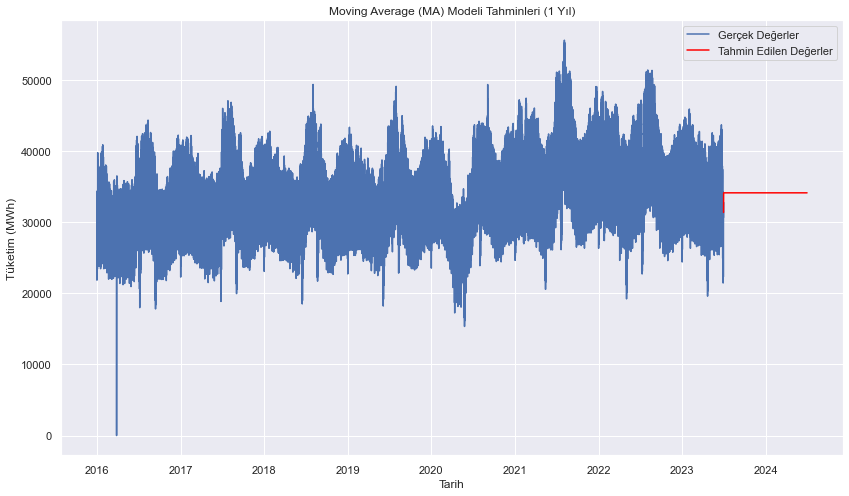

In [186]:
# V Moving Average (MA) Model
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Veri setini yükle
veri_seti = pd.read_excel("/Users/salihauludogan/Desktop/adsız klasör/Hourly_Turkey_Electricity_Consumption_Dataset_2016_2023.xlsx")

# Tarih ve saat sütunlarını birleştir ve datetime sütunu oluştur
veri_seti['Datetime'] = pd.to_datetime(veri_seti['date'].astype(str) + ' ' + veri_seti['hour'].astype(str))

# Tarih ve saat sütunlarını düşür
veri_seti = veri_seti.drop(['date', 'hour'], axis=1)

# Oluşturulan datetime sütununu indeks yap
veri_seti = veri_seti.set_index('Datetime')

# Moving Average (MA) modelini oluştur
model = ARIMA(veri_seti['consumption_mwh'], order=(0, 0, 1))

# Modeli eğit
model_fit = model.fit()

# Gelecekteki tüketim tahminlerini yap
n = 8760  # 1 yıllık (24 * 365) bir tahmin yapmak için
tahminler = model_fit.forecast(steps=n)

# Grafik çizimi
plt.figure(figsize=(14, 8))
plt.plot(veri_seti.index, veri_seti['consumption_mwh'], label='Gerçek Değerler')
plt.plot(pd.date_range(start=veri_seti.index[-1], periods=n, freq='H'), tahminler, label='Tahmin Edilen Değerler', color='red')
plt.xlabel('Tarih')
plt.ylabel('Tüketim (MWh)')
plt.title('Moving Average (MA) Modeli Tahminleri (1 Yıl)')
plt.legend()
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


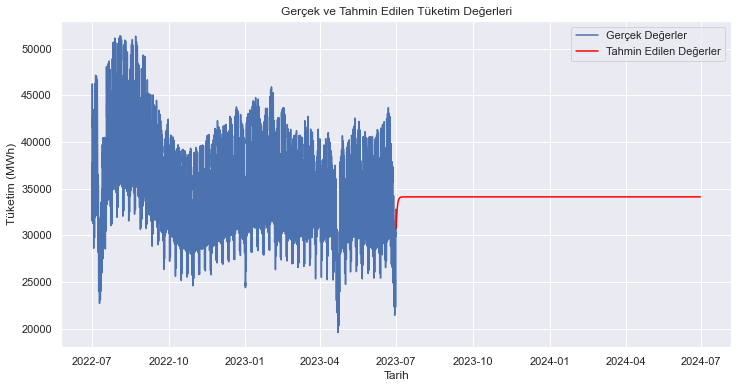

In [187]:
# ARIMA MODEL 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Veri setini yükle
veri_seti = pd.read_excel("/Users/salihauludogan/Desktop/adsız klasör/Hourly_Turkey_Electricity_Consumption_Dataset_2016_2023.xlsx")

# Tarih ve saat sütunlarını birleştir ve datetime sütunu oluştur
veri_seti['Datetime'] = pd.to_datetime(veri_seti['date'].astype(str) + ' ' + veri_seti['hour'].astype(str))

# Tarih ve saat sütunlarını düşür
veri_seti = veri_seti.drop(['date', 'hour'], axis=1)

# Oluşturulan datetime sütununu indeks yap
veri_seti = veri_seti.set_index('Datetime')

# AR modelini oluştur
model = AutoReg(veri_seti['consumption_mwh'], lags=1)

# Modeli eğit
model_fit = model.fit()

# Gelecekteki tüketim tahminlerini yap
n = 8760  # Bir yılın (365 gün * 24 saat) tahminini alalım
tahminler = model_fit.predict(start=len(veri_seti), end=len(veri_seti)+n-1, dynamic=False)

# Tahminler ve gerçek verileri birleştir
tahminler_df = pd.DataFrame({'Tarih': pd.date_range(start=veri_seti.index[-1], periods=n+1, freq='H')[1:], 'Tahmin Edilen Tüketim (MWh)': tahminler.values})
tahminler_df.set_index('Tarih', inplace=True)
gercek_veriler = veri_seti['consumption_mwh'].tail(n)

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(gercek_veriler.index, gercek_veriler, label='Gerçek Değerler')
plt.plot(tahminler_df.index, tahminler_df['Tahmin Edilen Tüketim (MWh)'], label='Tahmin Edilen Değerler', color='red')
plt.xlabel('Tarih')
plt.ylabel('Tüketim (MWh)')
plt.title('Gerçek ve Tahmin Edilen Tüketim Değerleri')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# XGBOOST MODEL
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import xgboost as xgb

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:


# Excel dosyasından veriyi oku
data = pd.read_excel('/Users/salihauludogan/Desktop/EnerjiTüketimTahmini/Hourly_Turkey_Electricity_Consumption_Dataset_2016_2023.xlsx')

# Verinin ilk birkaç satırını görüntüle
data.head()


,date,hour,consumption_mwh
0,2016-01-01,00:00:00,26277.24
1,2016-01-01,01:00:00,24991.82
2,2016-01-01,02:00:00,23532.61
3,2016-01-01,03:00:00,22464.78
4,2016-01-01,04:00:00,22002.91


In [190]:
data['Datetime'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['hour'].astype(str))

data = data.drop(['date', 'hour'], axis=1)

data = data.set_index('Datetime')

data.head()

,consumption_mwh
Datetime,
2016-01-01 00:00:00,26277.24
2016-01-01 01:00:00,24991.82
2016-01-01 02:00:00,23532.61
2016-01-01 03:00:00,22464.78
2016-01-01 04:00:00,22002.91


In [191]:

data = data.rename(columns={'consumption_mwh': 'PJM_Load_MW'})

data.head()

,PJM_Load_MW
Datetime,
2016-01-01 00:00:00,26277.24
2016-01-01 01:00:00,24991.82
2016-01-01 02:00:00,23532.61
2016-01-01 03:00:00,22464.78
2016-01-01 04:00:00,22002.91


In [192]:
data.index = pd.to_datetime(data.index)
data['year'] = data.index.year.astype(object)
data['month'] = data.index.month
data['dayofmonth'] = data.index.day.astype(object)

In [193]:

data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour


In [194]:
data['dayofyear']=data.index.dayofyear
data['weekday']=data.index.weekday
data['date']=data.index.date
data['wntr_month']=data.apply(lambda x: 1 if x.month in ([11,12,1,2]) else 0,axis=1) 
data['wntr_month']=data['wntr_month'].astype(object)
data['hour_label']=pd.cut(data.hour,bins=[0,5,10,15,20,24], labels=[0,1,2,3,0],ordered=False,right=False)
data['month_label']=data.month.map(lambda x : '1' if x in ([11,12,1,2,3]) else ( '2' if x in ([6,7,8,9]) else '3' ))
data['quarter']=data.month.map(lambda x : '1_çeyrek' if x in ([1,2,3]) else ( '2_çeyrek' if x in ([4,5,6]) else( '3_çeyrek' if x in ([7,8,9]) else '4_çeyrek') ))
data['season']=data.month.map(lambda x : 'kış' if x in ([12,1,2]) else ( 'ilkbahar' if x in ([3,4,5]) else( 'yaz' if x in ([6,7,8]) else 'sonbahar') ))
data['weekend']=data.dayofmonth.map(lambda x:  'hafta_içi' if x<5 else 'hafta_sonu')
data['working_hours']=data.hour.map(lambda x: 'work_hour' if (x<7) & (x>19) else 'not_work_hour' )

In [195]:

data.head()

,PJM_Load_MW,year,month,dayofmonth,dayofweek,hour,dayofyear,weekday,date,wntr_month,hour_label,month_label,quarter,season,weekend,working_hours
Datetime,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,26277.24,2016,1,1,4,0,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 01:00:00,24991.82,2016,1,1,4,1,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 02:00:00,23532.61,2016,1,1,4,2,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 03:00:00,22464.78,2016,1,1,4,3,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 04:00:00,22002.91,2016,1,1,4,4,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour


In [196]:
data

,PJM_Load_MW,year,month,dayofmonth,dayofweek,hour,dayofyear,weekday,date,wntr_month,hour_label,month_label,quarter,season,weekend,working_hours
Datetime,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,26277.24,2016,1,1,4,0,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 01:00:00,24991.82,2016,1,1,4,1,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 02:00:00,23532.61,2016,1,1,4,2,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 03:00:00,22464.78,2016,1,1,4,3,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
2016-01-01 04:00:00,22002.91,2016,1,1,4,4,1,4,2016-01-01,1,0,1,1_çeyrek,kış,hafta_içi,not_work_hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 19:00:00,30845.15,2023,6,30,4,19,181,4,2023-06-30,0,3,2,2_çeyrek,yaz,hafta_sonu,not_work_hour
2023-06-30 20:00:00,32501.52,2023,6,30,4,20,181,4,2023-06-30,0,0,2,2_çeyrek,yaz,hafta_sonu,not_work_hour
2023-06-30 21:00:00,32794.25,2023,6,30,4,21,181,4,2023-06-30,0,0,2,2_çeyrek,yaz,hafta_sonu,not_work_hour


In [198]:

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65712 entries, 2016-01-01 00:00:00 to 2023-06-30 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PJM_Load_MW    65712 non-null  float64 
 1   year           65712 non-null  object  
 2   month          65712 non-null  int64   
 3   dayofmonth     65712 non-null  object  
 4   dayofweek      65712 non-null  int64   
 5   hour           65712 non-null  int64   
 6   dayofyear      65712 non-null  int64   
 7   weekday        65712 non-null  int64   
 8   date           65712 non-null  object  
 9   wntr_month     65712 non-null  object  
 10  hour_label     65712 non-null  category
 11  month_label    65712 non-null  object  
 12  quarter        65712 non-null  object  
 13  season         65712 non-null  object  
 14  weekend        65712 non-null  object  
 15  working_hours  65712 non-null  object  
dtypes: category(1), float64(1), int64(5), obj

In [199]:
data.isnull().sum() #datamız temiz null yok

PJM_Load_MW      0
year             0
month            0
dayofmonth       0
dayofweek        0
hour             0
dayofyear        0
weekday          0
date             0
wntr_month       0
hour_label       0
month_label      0
quarter          0
season           0
weekend          0
working_hours    0
dtype: int64

In [200]:
data[data.duplicated()]

,PJM_Load_MW,year,month,dayofmonth,dayofweek,hour,dayofyear,weekday,date,wntr_month,hour_label,month_label,quarter,season,weekend,working_hours
Datetime,,,,,,,,,,,,,,,,
2016-03-27 04:00:00,24776.94,2016,3,27,6,4,87,6,2016-03-27,0,0,1,1_çeyrek,ilkbahar,hafta_sonu,not_work_hour


In [201]:
data.drop_duplicates(inplace=True)

In [202]:
data[data.duplicated()] #datamızda duplicate değer yok

,PJM_Load_MW,year,month,dayofmonth,dayofweek,hour,dayofyear,weekday,date,wntr_month,hour_label,month_label,quarter,season,weekend,working_hours
Datetime,,,,,,,,,,,,,,,,


In [203]:
data.year.value_counts()

2020    8784
2016    8783
2017    8760
2018    8760
2019    8760
2021    8760
2022    8760
2023    4344
Name: year, dtype: int64

In [204]:
outlier_treshold_up=data.PJM_Load_MW.std()*2.5+data.PJM_Load_MW.mean()
outlier_treshold_down=data.PJM_Load_MW.mean()-data.PJM_Load_MW.std()*2.5
print(f'outlier_treshold_up: {outlier_treshold_up:.2f},\noutlier_treshold_down: {outlier_treshold_down:.2f}')

outlier_treshold_up: 47971.22,
outlier_treshold_down: 20264.23


In [205]:
data = data[data['PJM_Load_MW'] >= outlier_treshold_down]



In [206]:
# Datamızda  çok küçük değerlerden kaynaklanan bir outlier durumumuz yok
data[data.PJM_Load_MW<outlier_treshold_down]

,PJM_Load_MW,year,month,dayofmonth,dayofweek,hour,dayofyear,weekday,date,wntr_month,hour_label,month_label,quarter,season,weekend,working_hours
Datetime,,,,,,,,,,,,,,,,


In [207]:
# Data da bu saatler eksik.Herhangi bir özel durum bulamadım.
a=list(pd.date_range(start='1998-04-01 01:00:00', end='2024-12-31 23:00:00', freq='H'))
set(a)-set(data.index)

{Timestamp('2013-09-16 09:00:00', freq='H'),
 Timestamp('2007-12-07 10:00:00', freq='H'),
 Timestamp('2000-05-03 06:00:00', freq='H'),
 Timestamp('1999-08-28 05:00:00', freq='H'),
 Timestamp('2014-01-31 00:00:00', freq='H'),
 Timestamp('2006-10-22 04:00:00', freq='H'),
 Timestamp('1999-03-14 00:00:00', freq='H'),
 Timestamp('2008-11-01 22:00:00', freq='H'),
 Timestamp('2015-06-06 09:00:00', freq='H'),
 Timestamp('2023-07-09 05:00:00', freq='H'),
 Timestamp('2008-10-29 10:00:00', freq='H'),
 Timestamp('1998-11-08 15:00:00', freq='H'),
 Timestamp('2012-12-01 21:00:00', freq='H'),
 Timestamp('2008-09-02 22:00:00', freq='H'),
 Timestamp('2008-10-01 12:00:00', freq='H'),
 Timestamp('2024-10-27 10:00:00', freq='H'),
 Timestamp('2000-01-03 20:00:00', freq='H'),
 Timestamp('2011-10-09 23:00:00', freq='H'),
 Timestamp('2023-08-02 18:00:00', freq='H'),
 Timestamp('2009-05-31 15:00:00', freq='H'),
 Timestamp('2010-11-08 01:00:00', freq='H'),
 Timestamp('2013-12-12 16:00:00', freq='H'),
 Timestamp

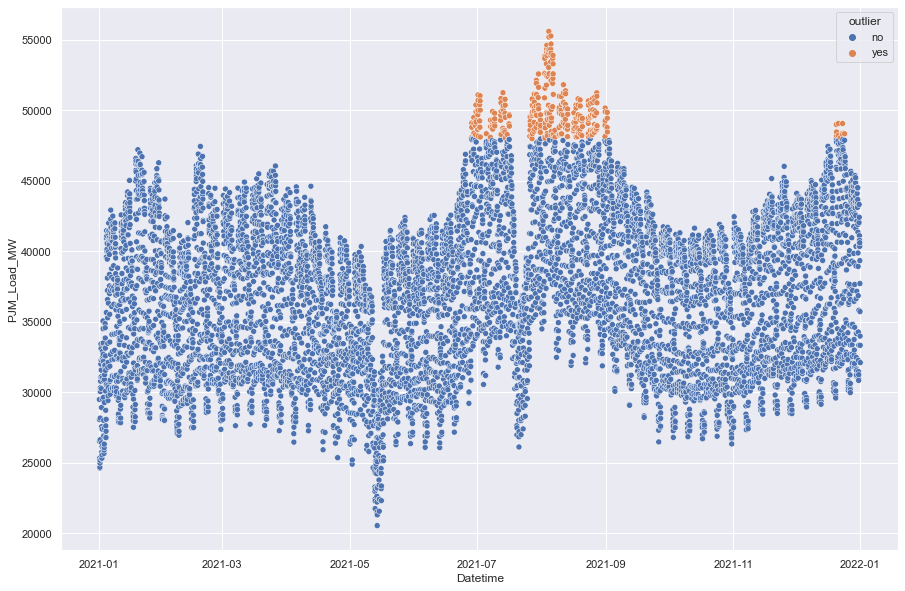

In [208]:
# Tek bir yıl için çizdirdim daha detayli görülebilmesi için.
# Outlierlarımız  genelde yaz aylarında gözlemleniyor.
sns.set(rc={'figure.figsize':(15,10)})
dum=data[data.year==2021].copy()
dum['outlier'] =dum['outlier'] = np.where(dum['PJM_Load_MW']>outlier_treshold_up, 'yes', 'no')
sns.scatterplot(x=dum.index,y='PJM_Load_MW',data=dum,hue=dum.outlier);

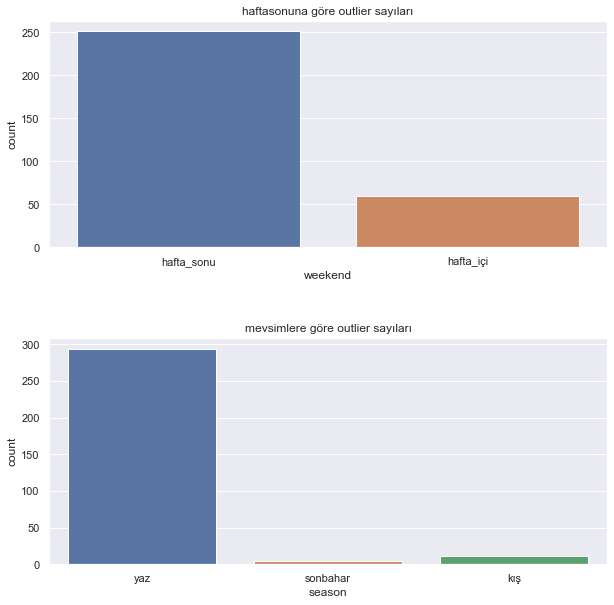

In [209]:
# Outlierlarımız yaz aylarında ve hafta sonlarında görülmekte buda mantıklı.
# Yıl içerisindeki primetime olarak değerlendirebilceğimiz dönemlerde outlierlarımız var.
sns.set(rc={'figure.figsize':(10,10)})
plt.subplot(2,1,1)
sns.countplot(x=dum[dum.outlier=='yes'].weekend).set_title('haftasonuna göre outlier sayıları');plt.subplot(2,1,2)
plt.subplots_adjust(hspace = 0.4)
sns.countplot(x=dum[dum.outlier=='yes'].season).set_title('mevsimlere göre outlier sayıları');

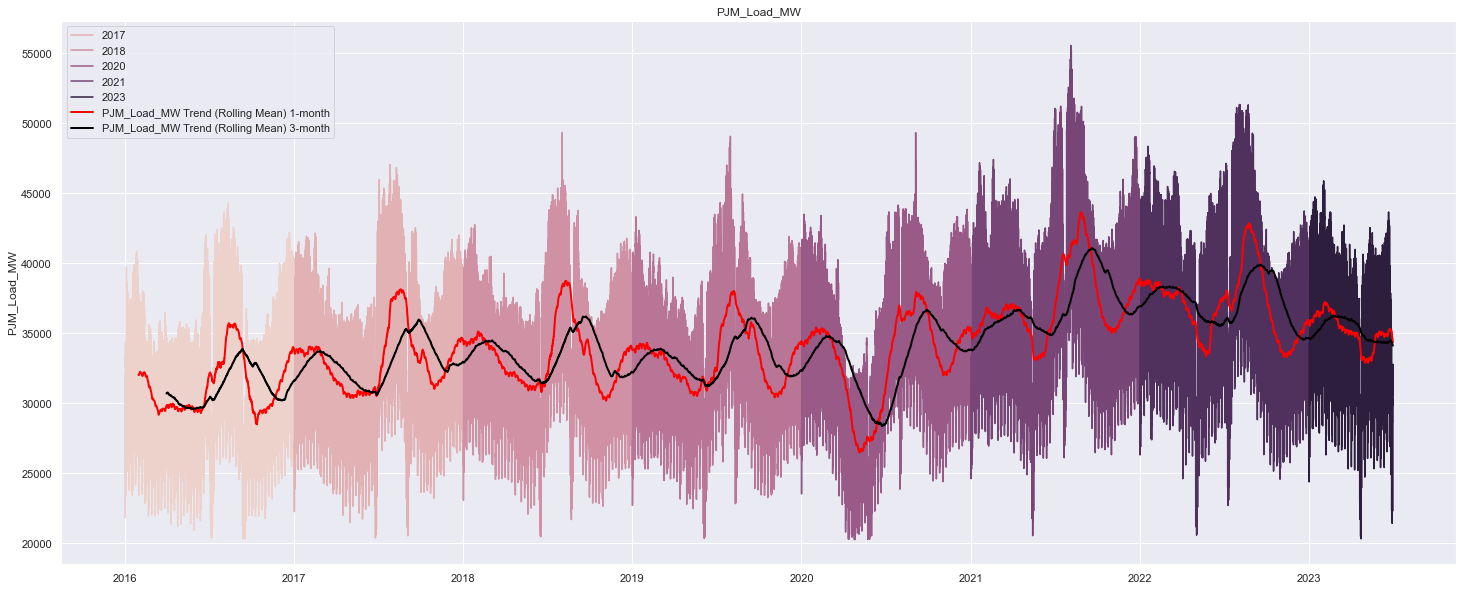

In [210]:
# Burada elektrik tüketiminde  sezonluk değişimlerin olduğu gözleniyor.
# Yine burada sezonsal bir durumun olduğunu gözlemleyebiliyoruz.
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x=data.index.values, y="PJM_Load_MW", hue=data.year,data=data).set_title('PJM_Load_MW')
plt.plot(data.PJM_Load_MW.rolling(24*30).mean(), alpha=1, color='red', label='PJM_Load_MW Trend (Rolling Mean) 1-month', linewidth = 2.0)
plt.plot(data.PJM_Load_MW.rolling(24*30*3).mean(), alpha=1, color='black', label='PJM_Load_MW Trend (Rolling Mean) 3-month', linewidth = 2.0)
plt.legend();

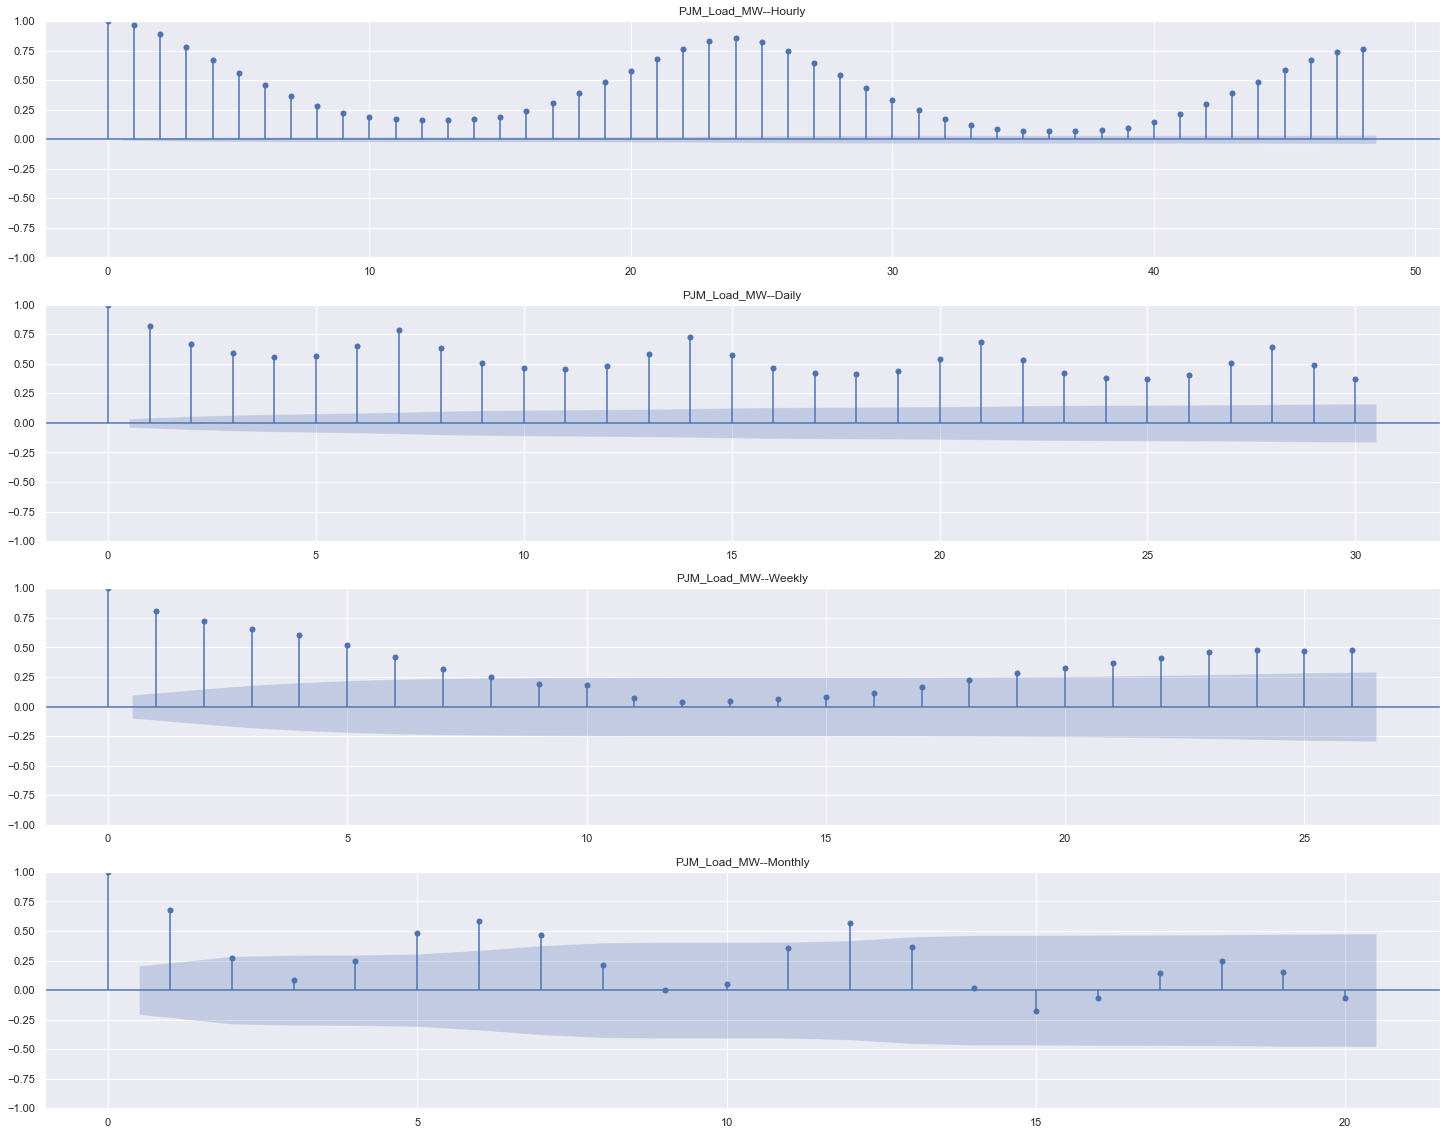

In [211]:
# Data içerisinde Auto-correlation gözlemliyoruz ki bu beklenmedik birşey değil.Yukarıdaki grafik bunun ipucunu veriyor.
# Grafiklerde verimizde günlük haftalık ve aylık trendlerin olduğunu görebiliyoruz.

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(25,20))
plot_acf(data.PJM_Load_MW,  title='PJM_Load_MW--Hourly',lags=48,ax=ax1)
plot_acf(data.PJM_Load_MW.resample('D').mean(),  title='PJM_Load_MW--Daily',lags=30,ax=ax2)
plot_acf(data.PJM_Load_MW.resample('W').mean(),  title='PJM_Load_MW--Weekly',ax=ax3)
plot_acf(data.PJM_Load_MW.resample('M').mean(),  title='PJM_Load_MW--Monthly',ax=ax4)
plt.show()

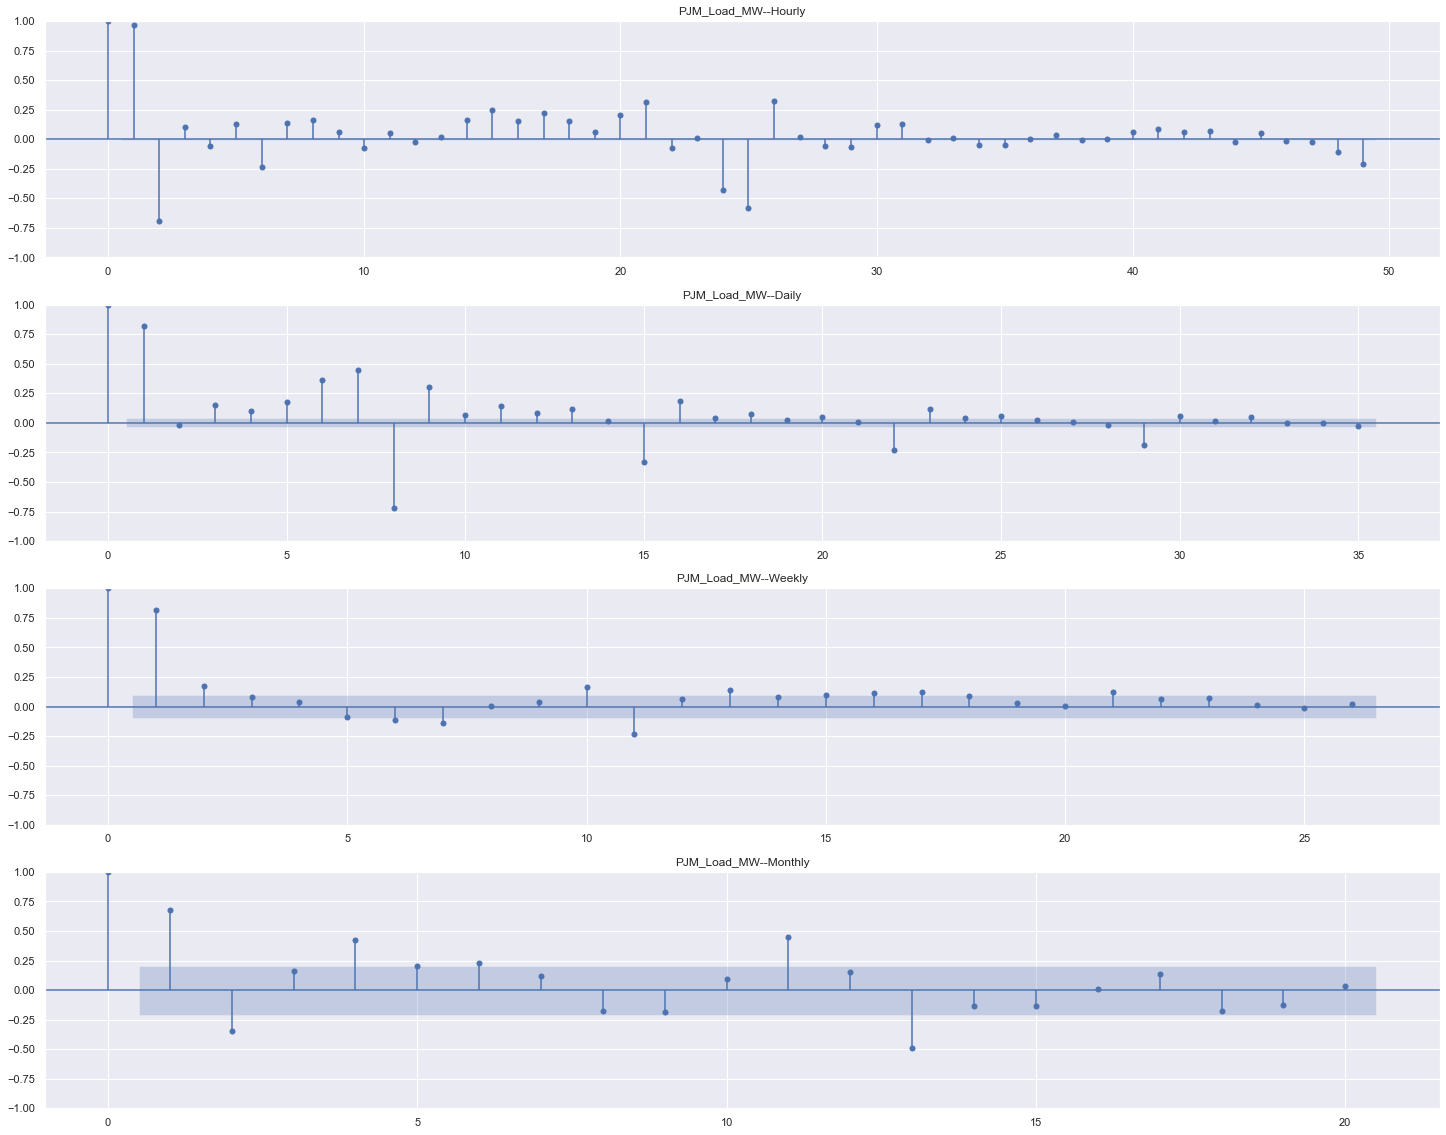

/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/3755330991.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PJM_Load_MW_shift_2"]=data["PJM_Load_MW"].shift(-1)
/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/3755330991.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PJM_Load_MW_shift_3"]=data["PJM_Load_MW"].shift(-2)
/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/3755330991.py:17: SettingWithCopyWarning: 
A value is trying to be set on

In [212]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(25,20))
plot_pacf(data.PJM_Load_MW,  title='PJM_Load_MW--Hourly',ax=ax1,method='ywm')
plot_pacf(data.PJM_Load_MW.resample('D').mean(),  title='PJM_Load_MW--Daily',ax=ax2,method='ols')
plot_pacf(data.PJM_Load_MW.resample('W').mean(),  title='PJM_Load_MW--Weekly',ax=ax3,method='ols')
plot_pacf(data.PJM_Load_MW.resample('M').mean(),  title='PJM_Load_MW--Monthly',ax=ax4,method='ols')

plt.show()

# Grafikte, 1.2. ve 3.  gecikmeler için kısmi kolerasyonlar yüksek.
# 1. grafikte 1.,2. ve 3. gecikmeler modele konulabilir.Kolerasyonları yüksek.
# Daily grafiğine bakınca birbirini takip iki gün arasında bir kolerasyonun varlığndan bahsedebiliriz.
# Weekly grafiğine bakınca yine birbirini takip eden haftalar arasında bir kolerasyonun varlığından bahsedebiliriz. Monthly grafiğinde bu nispeten daha az.

# lag featureları ekliyorum.
data["PJM_Load_MW_shift_2"]=data["PJM_Load_MW"].shift(-1)
data["PJM_Load_MW_shift_3"]=data["PJM_Load_MW"].shift(-2)
data["PJM_Load_MW_shift_4"]=data["PJM_Load_MW"].shift(-3)

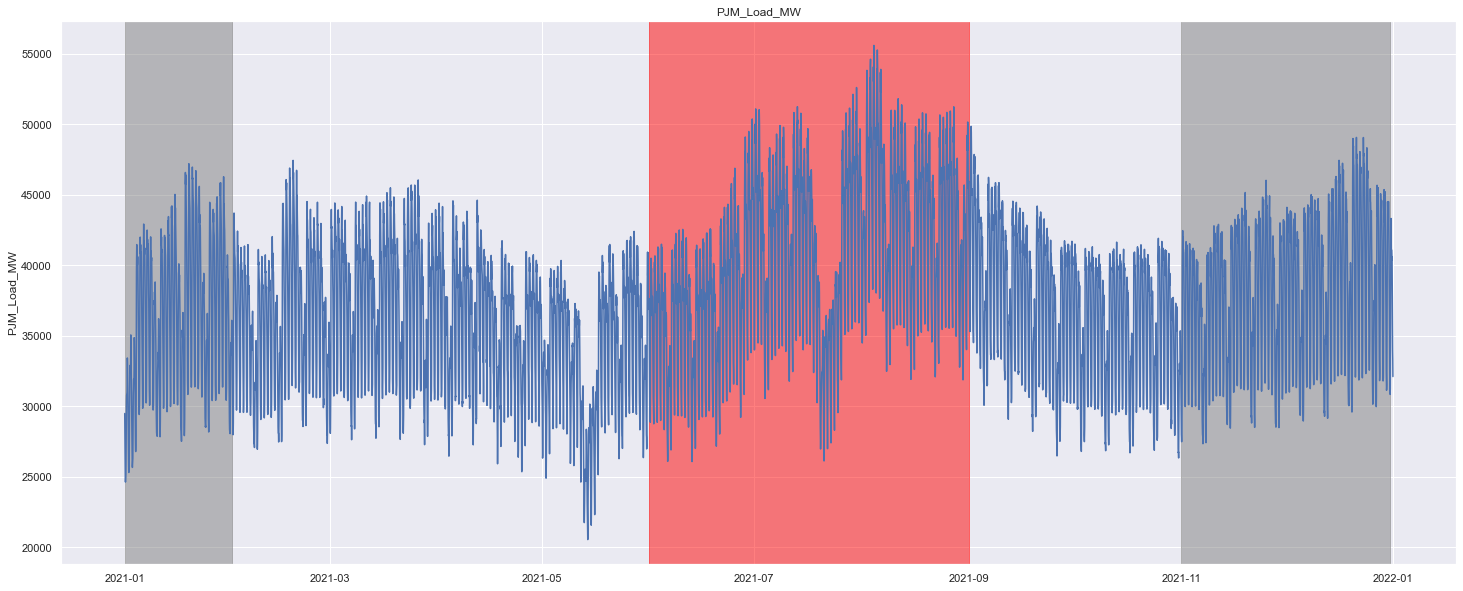

In [213]:
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x=data[data.year==2021].index.values, y="PJM_Load_MW",data=data[data.year==2021]).set_title('PJM_Load_MW');
plt.axvspan('2021-06-01 00:00:00','2021-09-01 00:00:00',color="red",alpha=0.5)
plt.axvspan('2021-01-01 00:00:00','2021-02-01 00:00:00',color="grey",alpha=0.5) 
plt.axvspan('2021-11-01 00:00:00','2021-12-31 00:00:00',color="grey",alpha=0.5);

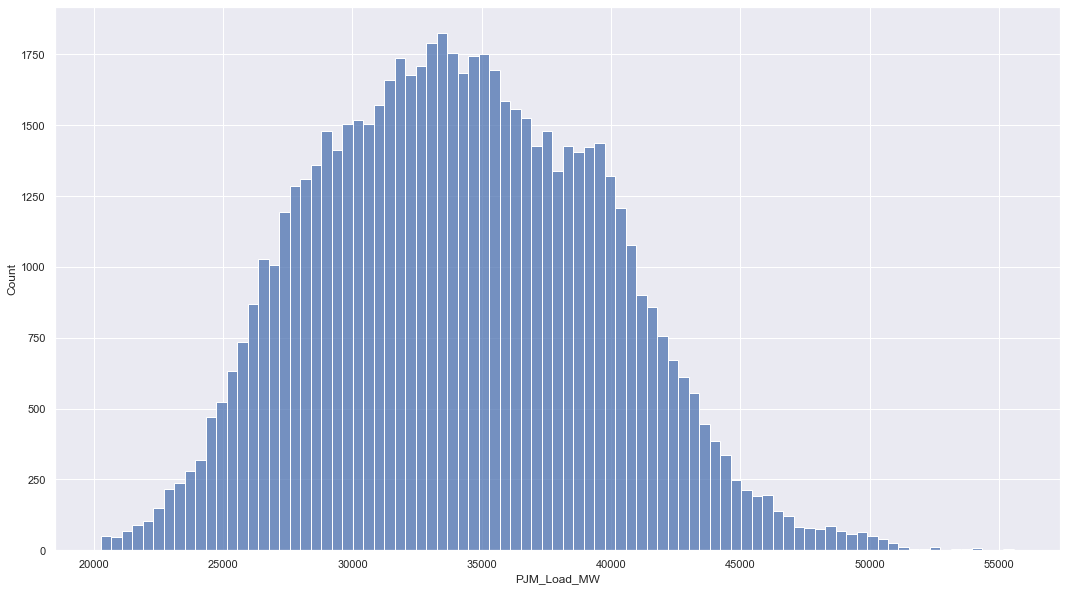

In [214]:
# Verimizin dağılımı normal değil.Dağılımın right skewed olduğunu söyleyebiliriz.
sns.set(rc={'figure.figsize':(18,10)})
sns.histplot(x=data.PJM_Load_MW);

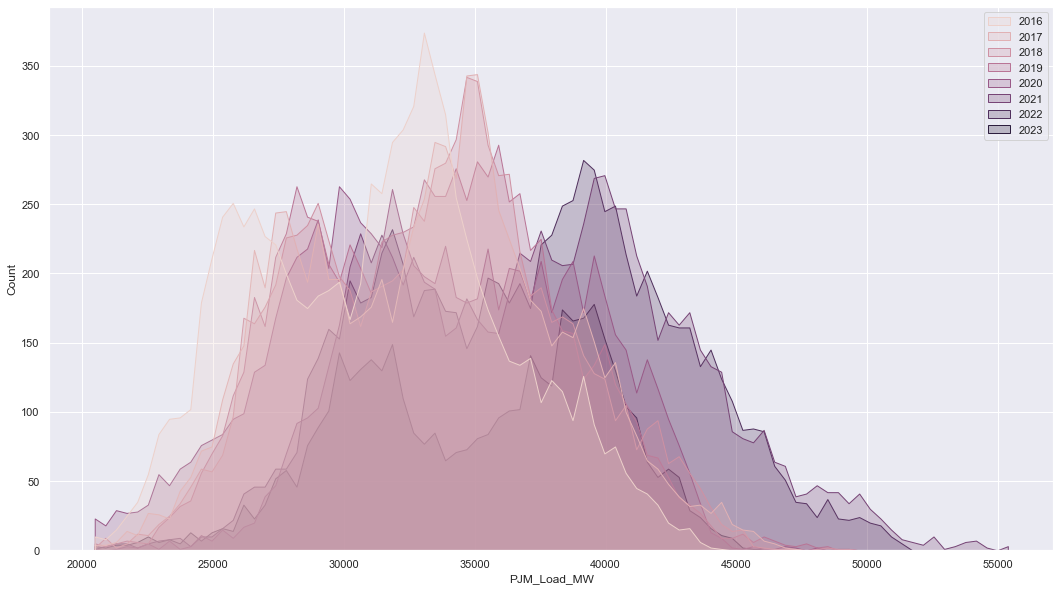

In [215]:
# Yıllara göre baktığımız da dağılımların birbine yakın olduğunu  gözlemleyebiliyoruz.
sns.histplot(x=data.PJM_Load_MW ,hue=data.year.values, element="poly");

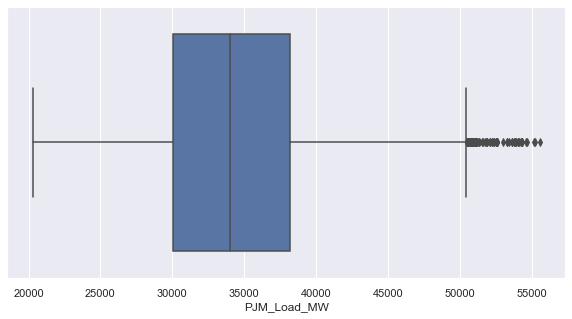

In [216]:
# Outlier değerler
# Outlierlar üzerinde bir işlem yapma gereği duymadım çünkü aşırı göze batan bir outlier durumumuz yok.
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data.PJM_Load_MW);

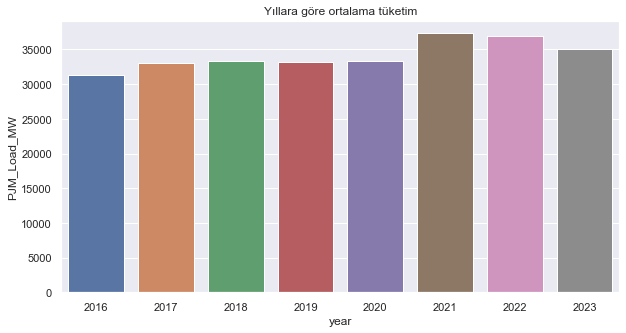

In [217]:

# Yıllara göre ortalama tüketimde  bir artış var.
dum=data.groupby(['year'])['PJM_Load_MW'].mean().reset_index()
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='year',y='PJM_Load_MW',data=dum).set_title('Yıllara göre ortalama tüketim');

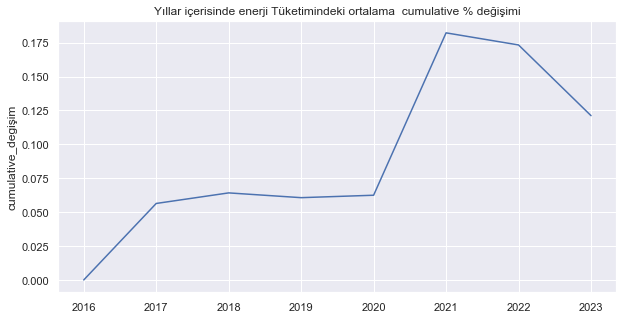

In [218]:
# Burada ortalama enerji tüketiminin yıllar içerisinde arttığını gözlemliyoruz ama artış hızında bir azalma var.
# 2016-2023 arasında ortalama tüketimde %4.6 artmış 3 yılda aslında çok az.
dum=data.groupby(['year'])['PJM_Load_MW'].mean().reset_index()
dum['cumulative_degişim']=dum.PJM_Load_MW.pct_change().cumsum().fillna(0)
ax=sns.set(rc={'figure.figsize':(10,5)})
ax=sns.lineplot(x=dum.year.values,y=dum.cumulative_degişim).set_title('Yıllar içerisinde enerji Tüketimindeki ortalama  cumulative % değişimi')

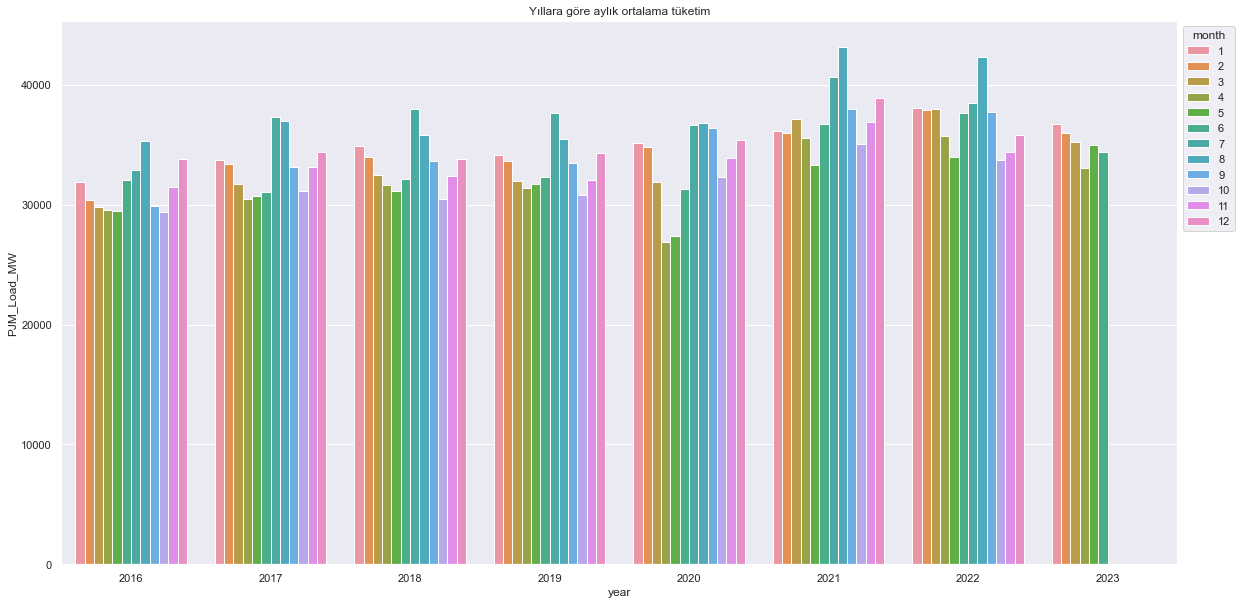

In [220]:
# Yıllara göre aylık ortalma tüketim miktarları
# Yine burada genel trendin yıllar içerisinde aynı olduğunu gözlemleyebiliriz.
# İlkbahar ve sonbahar aylarında yaz ve kış aylarına göre tüketim daha düşük kalmakta.
dum=data.groupby(['year','month'])[['PJM_Load_MW']].mean().reset_index()
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(x='year',y='PJM_Load_MW',hue='month',data=dum)
ax.set_title('Yıllara göre aylık ortalama tüketim')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

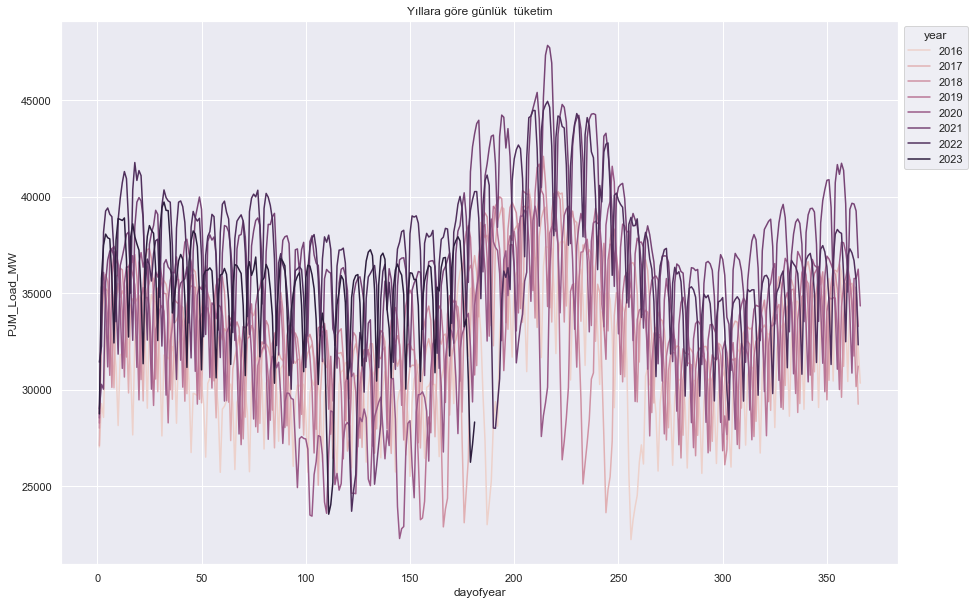

In [221]:
# Yine burada da yıllara göre günlük tüketim miktarlarını çizdirdim yaz ve kış günlerinde tüketim fazla
dum=data.groupby(['year','dayofyear'])[['PJM_Load_MW']].mean().reset_index()
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.lineplot(x=dum.dayofyear,y=dum.PJM_Load_MW,hue=dum.year,legend=all)
ax.set_title('Yıllara göre günlük  tüketim')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

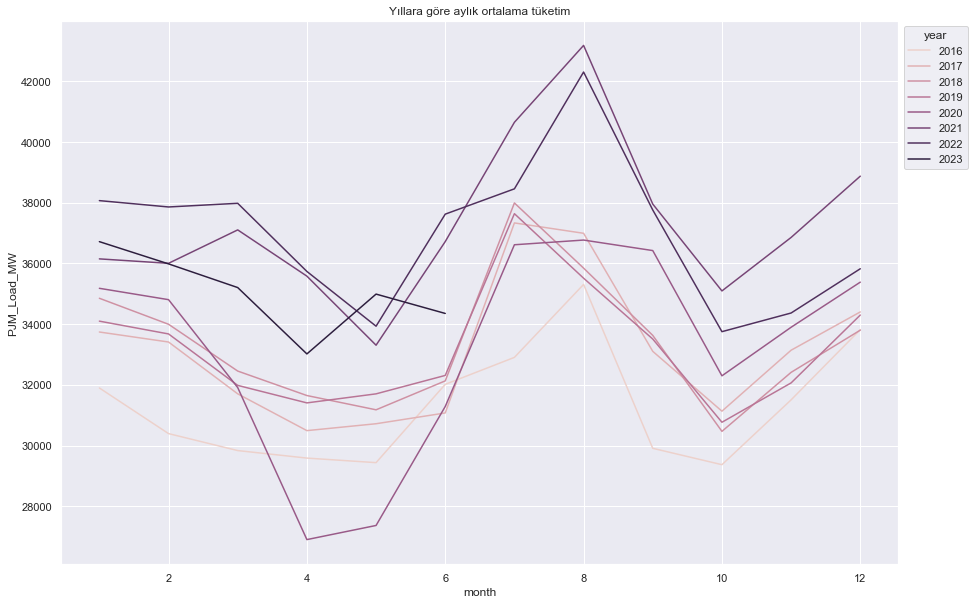

In [222]:
# Aylara göre batığımızda bir seasonality gözlemliyoruz ilkbahar ve sonhar aylarında enerji tüketimi yaz ve kış aylarına göre nispeten daha az 
# Bunu kışın ısınmadan kaynaklı yazın ise soğutmadan kaynaklı enerji tüketimi ile açıklayabiliriz.
dum=data.groupby(['year','month'])[['PJM_Load_MW']].mean().reset_index()
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.lineplot(x=dum.month,y=dum.PJM_Load_MW,hue=dum.year,legend=all,linewidth = 1.5)
ax.set_title('Yıllara göre aylık ortalama tüketim')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

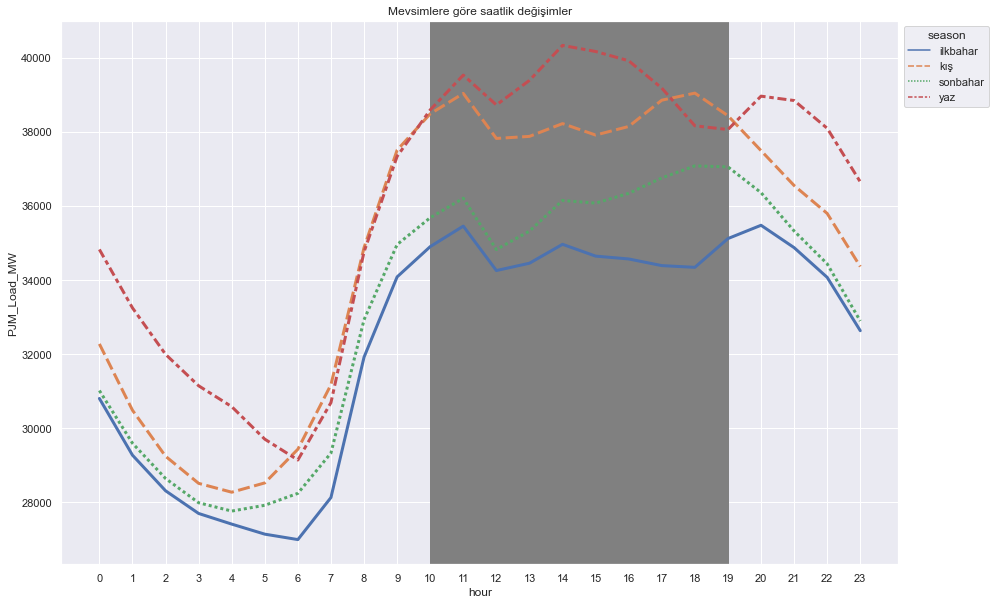

In [223]:

# Gri ile boyalı alan kışın  insanların işte olduğu vakitlerde elektrik tüketimi azalmakta fakat 
# Prime time(19.00 - 22.00)  zaman diliminde insalar işten dönüş evdeki elektrikli araçların çalışması(çamaşır mak.,bulaşık mak., gibi) elektrik tüketimi artıyor.
# Aynı şeyleri yaz ayları içinde söyleyebiliriz fakat burda şöyle bir durum var kışın ısınmak için illa elektriğe  ihtiyaç duyulmayabilir(hidrokarbon yakıtlar ile ısınma sağlanabilir)
# ama yaz aylarında soğutma için elektrik şart bu yüzden yaz döneminde gerek evlerde gerek iş yerlerinde soğutma için elektrik tüketilir buda yaz aylarında elektirk tüketim talebinin yüksek olmasını açıklar. 
# Gece saatlerinde elektrik tüketimi gün içine göre daha az gece activetenin azaldığını dünüşürsek bu mantıklı.

dum=data.groupby(['season','hour'])[['PJM_Load_MW']].mean().reset_index()
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.lineplot(x=dum.hour,y=dum.PJM_Load_MW,hue=dum.season,legend=all,linewidth=3,style=dum.season)
ax.set_title('Mevsimlere göre saatlik değişimler')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticks(range(0,24));
plt.axvspan(10,19,color="gray") ;

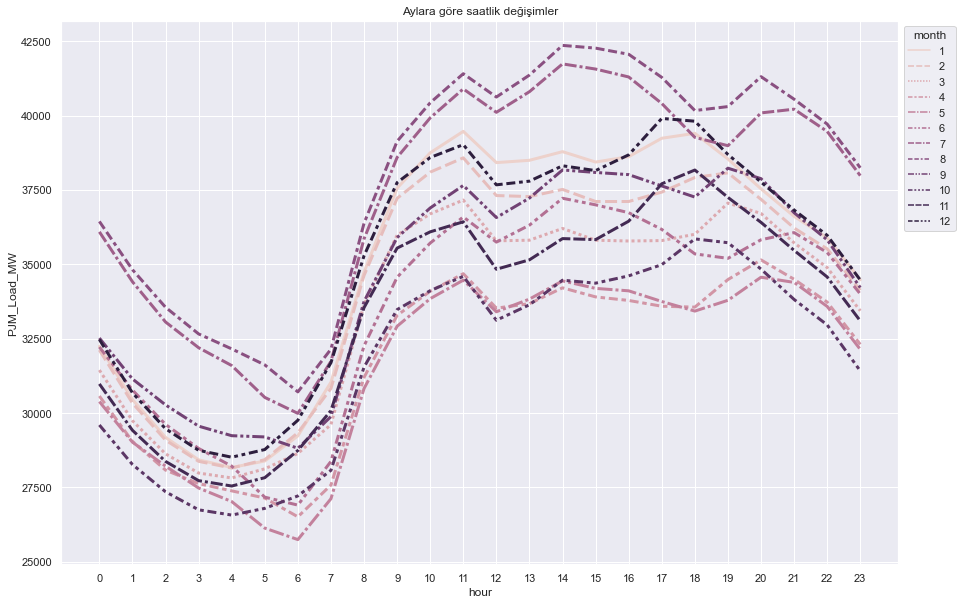

In [224]:
dum=data.groupby(['month','hour'])[['PJM_Load_MW']].mean().reset_index()
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.lineplot(x=dum.hour,y=dum.PJM_Load_MW,hue=dum.month,legend=all,linewidth=3,style=dum.month)
ax.set_title('Aylara göre saatlik değişimler')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticks(range(0,24));

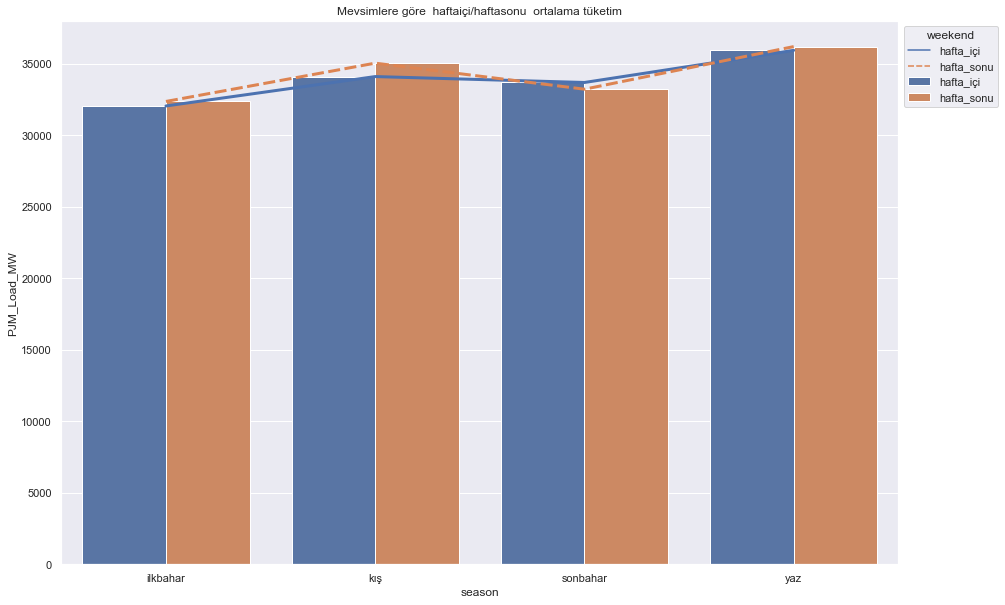

In [225]:
# Yaz ve Kış aylarında haftasonları elektrik tüketimi ortalaması daha yüksek.
# Yaz ayı için hafta içi insanların işte hafta sonları da evde olduğunu düşünürsek,iş te olmaları ev ısıtması için enerji tüketim talebini artırır hafta sonu evde soğutma için tüketim talebi daha fazla olabilir.
# Kış ayında ısınma talebi hafta sonu insanlar evde olduklarında daha fazla olabilri buda tüketimi artırabilir.
# Sonbahar ve İlkbahar ayları nispeten elektrik tüketimi daha az.
dum=data.groupby(['season','weekend'])[['PJM_Load_MW']].mean().reset_index()
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.lineplot(x=dum.season,y=dum.PJM_Load_MW,hue=dum.weekend,legend=all,linewidth=3,style=dum.weekend)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax=sns.barplot(x=dum.season,y=dum.PJM_Load_MW,hue=dum.weekend)
ax.set_title('Mevsimlere göre  haftaiçi/haftasonu  ortalama tüketim')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

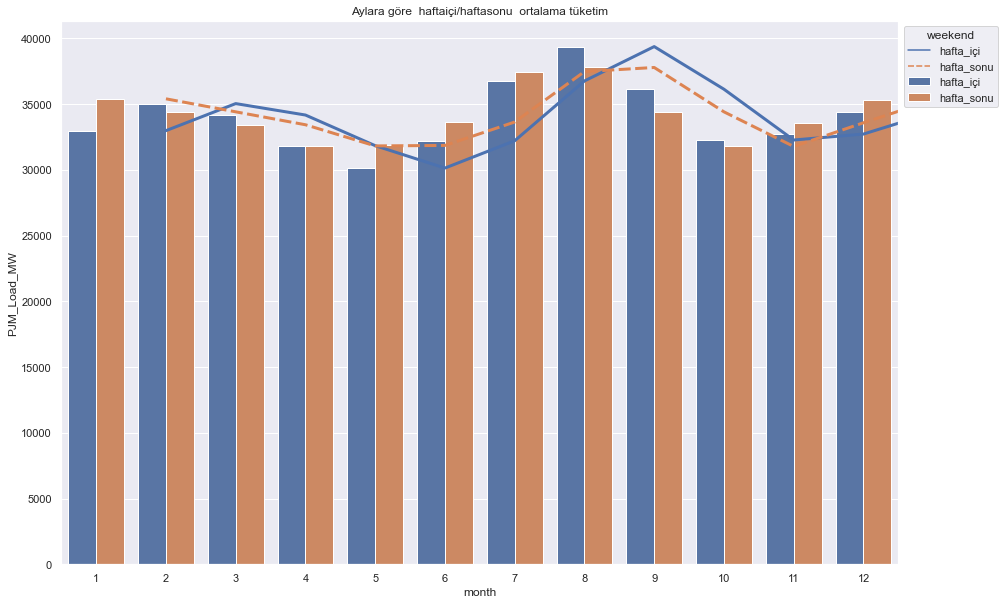

In [226]:
# İlkbahar ve sonbahar aylarına girerken hafta sonları enerji tüketimi hafta içine göre daha düşük
# İlkbahhar ve sonbahar aylarından cıkarken(yani yaz ve kış aylarına girmeye başladığımızda) bu durum tam tersine dönüyor.

dum=data.groupby(['month','weekend'])[['PJM_Load_MW']].mean().reset_index()
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.lineplot(x=dum.month,y=dum.PJM_Load_MW,hue=dum.weekend,legend=all,linewidth=3,style=dum.weekend)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax=sns.barplot(x=dum.month,y=dum.PJM_Load_MW,hue=dum.weekend)
ax.set_title('Aylara göre  haftaiçi/haftasonu  ortalama tüketim')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/2401243820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PJM_Load_MW_roll"] = data["PJM_Load_MW"].rolling(24).mean()  # Günlük
/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/2401243820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PJM_Load_MW_roll_2"] = data["PJM_Load_MW"].rolling(24*15).mean() # 15 günlük
/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/2401243820.py:4: SettingWithCopy

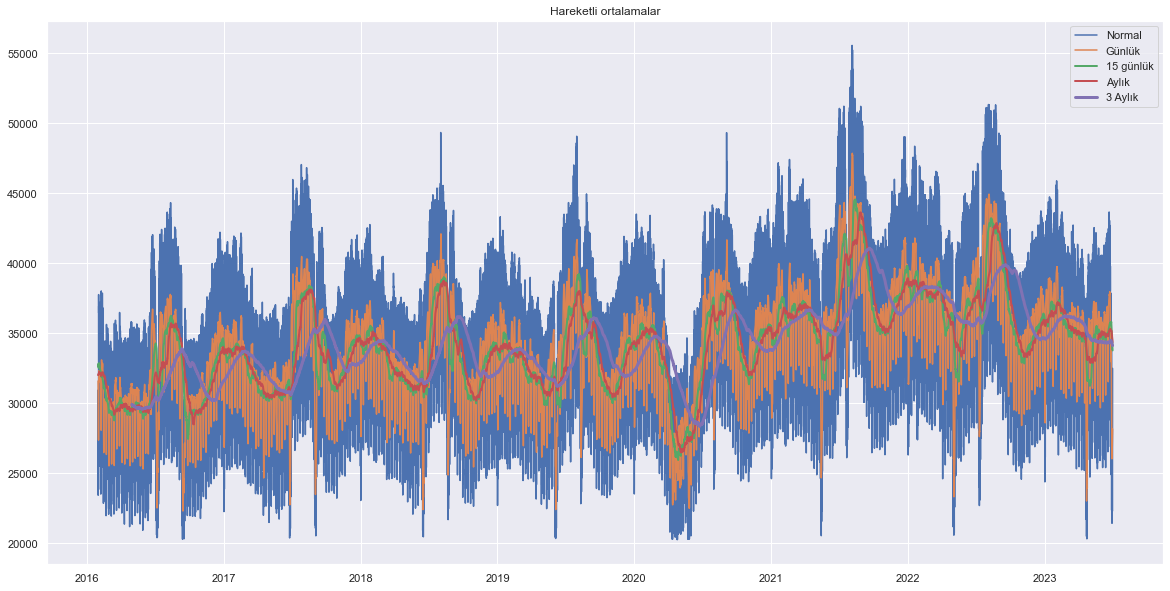

In [227]:
# Günlük,15 günlük ve Aylık hareketli ortalamalarını feature olarak ekledim.
data["PJM_Load_MW_roll"] = data["PJM_Load_MW"].rolling(24).mean()  # Günlük 
data["PJM_Load_MW_roll_2"] = data["PJM_Load_MW"].rolling(24*15).mean() # 15 günlük
data["PJM_Load_MW_roll_3"] = data["PJM_Load_MW"].rolling(24*30).mean() # Aylık
data=data.dropna()
plt.figure(figsize=(20,10))
plt.title('Hareketli ortalamalar')
plt.plot(data.PJM_Load_MW,label='Normal')
plt.plot(data.PJM_Load_MW_roll,label='Günlük')
plt.plot(data.PJM_Load_MW_roll_2,label='15 günlük',linewidth=2)
plt.plot(data.PJM_Load_MW_roll_3,label='Aylık',linewidth=2)
plt.plot(data["PJM_Load_MW"].rolling(24*30*3).mean(),label='3 Aylık',linewidth=3)
plt.legend();

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Dates train      : 2016-01-30 23:00:00 --- 2022-05-31 23:00:00  (n=55326)
Dates validation : 2022-05-31 23:00:00 --- 2023-06-30 20:00:00  (n=9476)
-------------------------------------------------------------------------------
data_train shape :(55326, 64), target_train shape :(55326,)
data_valid shape   :(9476, 64)  , target_valid shape   :(9476,)


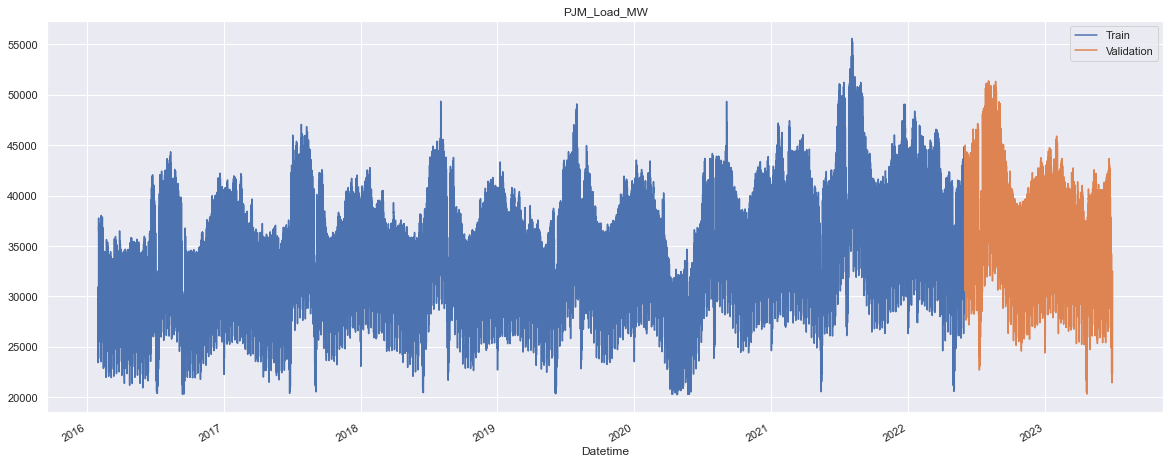

In [228]:
# Data daki döngüsel özellikler için modelin zamansal bir döngüde olduğunu anlamasına yardımcı olur.
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
encode(data, 'dayofyear', 365)
encode(data, 'month', 12)


# **Train ve Validation split**
data2=data.drop(['date','dayofyear'],axis=1)
data_dum=pd.get_dummies(data2,prefix=None,prefix_sep='_',drop_first=True)
end_train = '2022-5-31 23:00:00'    #bu tarihe kadar olan kısım train sonrasını validation olarak alıyorum.
data_train = data_dum.loc[:end_train]
data_valid  = data_dum.loc[end_train:]

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates validation : {data_valid.index.min()} --- {data_valid.index.max()}  (n={len(data_valid)})")
# # ==============================================================================
fig, ax = plt.subplots(figsize=(20, 8))
data_train['PJM_Load_MW'].plot(ax=ax, label='Train')
data_valid['PJM_Load_MW'].plot(ax=ax, label='Validation')
ax.set_title('PJM_Load_MW')
ax.legend();
# ==============================================================================
target_train=data_train.PJM_Load_MW.values
data_train=data_train.drop(['PJM_Load_MW'],axis=1)
target_valid=data_valid.PJM_Load_MW.values
data_valid=data_valid.drop(['PJM_Load_MW'],axis=1)

sc=StandardScaler()
data_train=sc.fit_transform(data_train)
data_valid=sc.transform(data_valid)
print('-------------------------------------------------------------------------------')
print(f'data_train shape :{data_train.shape}, target_train shape :{target_train.shape}')
print(f'data_valid shape   :{data_valid.shape}  , target_valid shape   :{target_valid.shape}')

In [229]:
#lambda: L2 regularization terimi için bir katsayıdır. Bu değer ne kadar büyük olursa, modelin aşırı uyumu (overfitting) azalabilir.
#alpha: L1 regularization terimi için bir katsayıdır. Bu değer ne kadar büyük olursa, modelin aşırı uyumu azalabilir.
#colsample_bytree: Her bir ağaç oluşturulurken kullanılacak olan sütunların oranını belirler. Bu değer 0 ile 1 arasında olmalıdır. Örneğin, 0.8 değeri her ağaç için ortalama sütunların %80'ini rastgele seçer.
#subsample: Veri örnekleme oranıdır. Bu değer 0 ile 1 arasında olmalıdır. Örneğin, 0.8 değeri her ağaç için rastgele %80 veriyi seçer.
#learning_rate: Boosting algoritmasının her iterasyonunda her ağacın katkısının büyüklüğünü belirleyen bir parametredir.
#n_estimators: Oluşturulacak olan ağaç sayısıdır. Bu değer ne kadar büyük olursa, modelin karmaşıklığı artar.
#max_depth: Her bir ağacın maksimum derinliğidir. Bu değer ne kadar büyük olursa, modelin karmaşıklığı artar.
#random_state: Rastgele sayı üretecinin başlangıç durumunu belirler. Bu, tekrarlanabilir sonuçlar elde etmek için kullanılır.
#min_child_weight: Bir yapının bölünmesi için gereken minimum örnek sayısıdır.
#tree_method: Ağaçların oluşturulma yöntemini belirler. "hist" seçeneği, hızlı histogram tabanlı yaklaşımı kullanır.
import optuna
def objective(trial,data=data_train,target=target_train):
    
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.08,0.009,0.01,0.012,0.014,0.016,0.018,0.001,0.1,0.5]),
        'n_estimators': 1000,
        'max_depth': trial.suggest_categorical('max_depth', [3,4,5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'tree_method':'hist'
    }
    
    xgb_tuned=xgb.XGBRegressor(**param)
    xgb_tuned.fit(data_train, target_train)

    rmse = np.sqrt(mean_squared_error(target_valid,xgb_tuned.predict(data_valid)))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=80)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-05-13 16:09:49,158] A new study created in memory with name: no-name-c2a280f9-5e84-4f65-88d5-9278d429b7c5
/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/430271840.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10),
/var/folders/r7/qq3kbsb160x76mlbtjvy85880000gn/T/ipykernel_15403/430271840.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10),
[I 2024-05-13 16:09:59,794] Trial 0 finished with value: 357.8400246695478 and parameters: {'lambda': 0.007453981097161505, 'alpha': 0.0017823033452199993, 'colsample_bytree': 0.8, 'subsample': 0.7, '

Number of finished trials: 80
Best trial: {'lambda': 7.368787918773811, 'alpha': 0.0034328773652025583, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.08, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 82}


In [230]:
# En iyi sonucu veren parametre değerlerimiz.
study.best_trial.params

{'lambda': 7.368787918773811,
 'alpha': 0.0034328773652025583,
 'colsample_bytree': 0.8,
 'subsample': 0.8,
 'learning_rate': 0.08,
 'max_depth': 13,
 'random_state': 24,
 'min_child_weight': 82}

In [231]:
params = {
    'n_estimators': 1000, 
    'tree_method': 'hist',
}
params.update(study.best_trial.params) # En iyi sonuç veren paramtre değerleri params ile birleştirildi.

eval_set=[(data_train, target_train), (data_valid, target_valid)]
xgb_tuned=xgb.XGBRegressor(**params).fit(data_train,target_train,eval_metric=['rmse','mape'], eval_set=eval_set,verbose=False,early_stopping_rounds=100)


print('Model train')
print('RMSE score: ',np.sqrt(mean_squared_error(target_train,xgb_tuned.predict(data_train))))
print('r2_score: ',r2_score(target_train,xgb_tuned.predict(data_train)))
print('MAPE score :',mean_absolute_percentage_error(target_train,xgb_tuned.predict(data_train)))
print('-----------------------------------------------------------------------')
print('Model valid')
print('RMSE score :',np.sqrt(mean_squared_error(target_valid,xgb_tuned.predict(data_valid))))
print('r2_score :',r2_score(target_valid,xgb_tuned.predict(data_valid)))
print('MAPE score :',mean_absolute_percentage_error(target_valid,xgb_tuned.predict(data_valid)))

Model train
RMSE score:  171.48550491901983
r2_score:  0.9990013954805702
MAPE score : 0.0037487091030048458
-----------------------------------------------------------------------
Model valid
RMSE score : 335.7604947552154
r2_score : 0.9961687866452896
MAPE score : 0.0067634543133418615


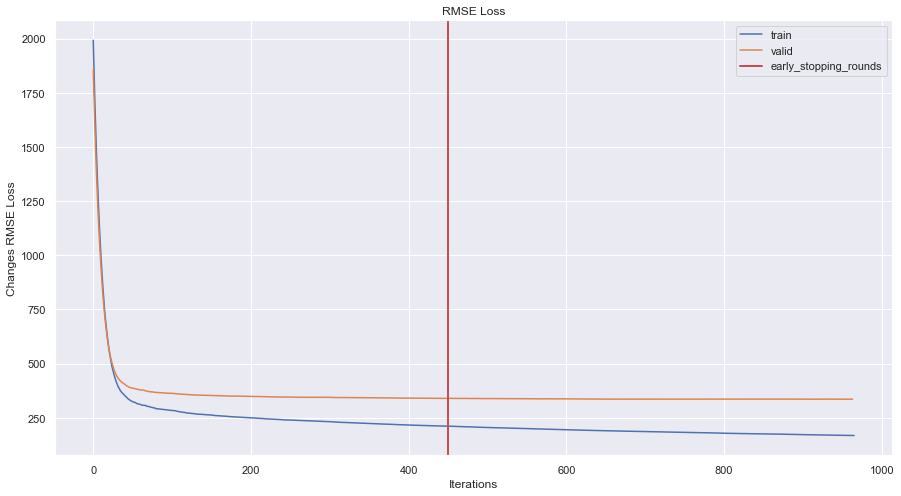

In [233]:
# Not: Daha net görülmesi için belli bir eşik değerin altındaki RMSE değerlerini  aldım.
# Modelin 450. iterasyondan sonra validation hatasını düüşlerin yavaşladığını gözlemliyoruz burda artık modelin overfit durumuna geçmeye başladığını söyleyebiliriz.
results=xgb_tuned.evals_result()
plt.figure(figsize=(15,8))
plt.title('RMSE Loss')
plt.plot(np.array(results['validation_0']['rmse'])[np.array(results['validation_0']['rmse'])<2000], label='train')
plt.plot(np.array(results['validation_1']['rmse'])[np.array(results['validation_1']['rmse'])<2000], label='valid')
plt.axvline(x=450, color='r', linestyle='-',label='early_stopping_rounds',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Changes RMSE Loss')
plt.legend();

In [234]:
print(f'Verideki yüzdelik değişimlerin mutlak ortalamsı: {abs(data.PJM_Load_MW.pct_change()).mean()}')

Verideki yüzdelik değişimlerin mutlak ortalamsı: 0.03236251131495993


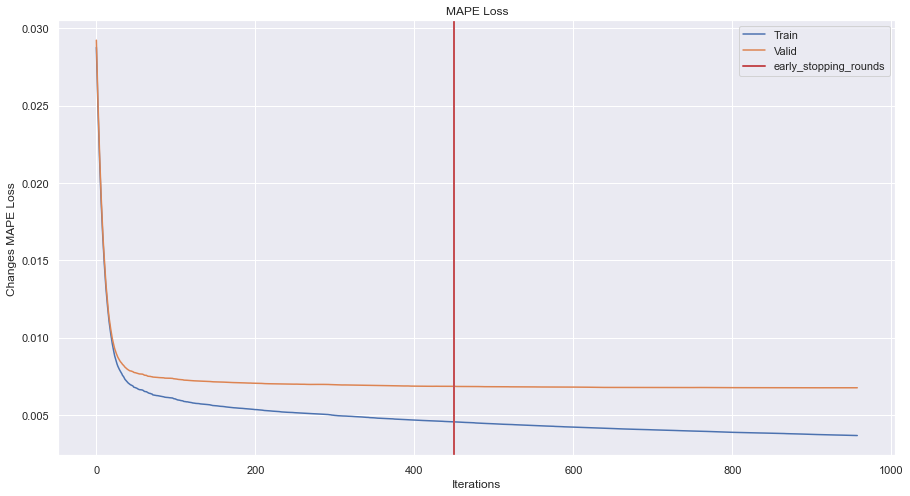

In [235]:
# Not: Daha net görebilmek için belirli bir değerin altındaki MAPE değerlerini çizdirdim.
# MAPE değeri  belirli bir iterasyondan sonra train setinde düşüş devam ederken validation setimizde değişimler çok küçük oluyor 
# Bu noktadan sonra modelin artık overfit olmaya başladığını,genelleme yapmakta zorlandığını söyleyebiliriz.
# Grafikte Validation MAPE değeri 450. iterasyondan sonra artık yavaş yavaş train MAPE değerininden ayrılmanın başladığını görüyoruz.
plt.figure(figsize=(15,8))
plt.title('MAPE Loss')
plt.plot(np.array(results['validation_0']['mape'])[np.array(results['validation_0']['mape'])<0.03], label='Train')
plt.plot(np.array(results['validation_1']['mape'])[np.array(results['validation_1']['mape'])<0.03], label='Valid')
plt.axvline(x=450, color='r', linestyle='-',label='early_stopping_rounds',linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Changes MAPE Loss')
plt.legend();

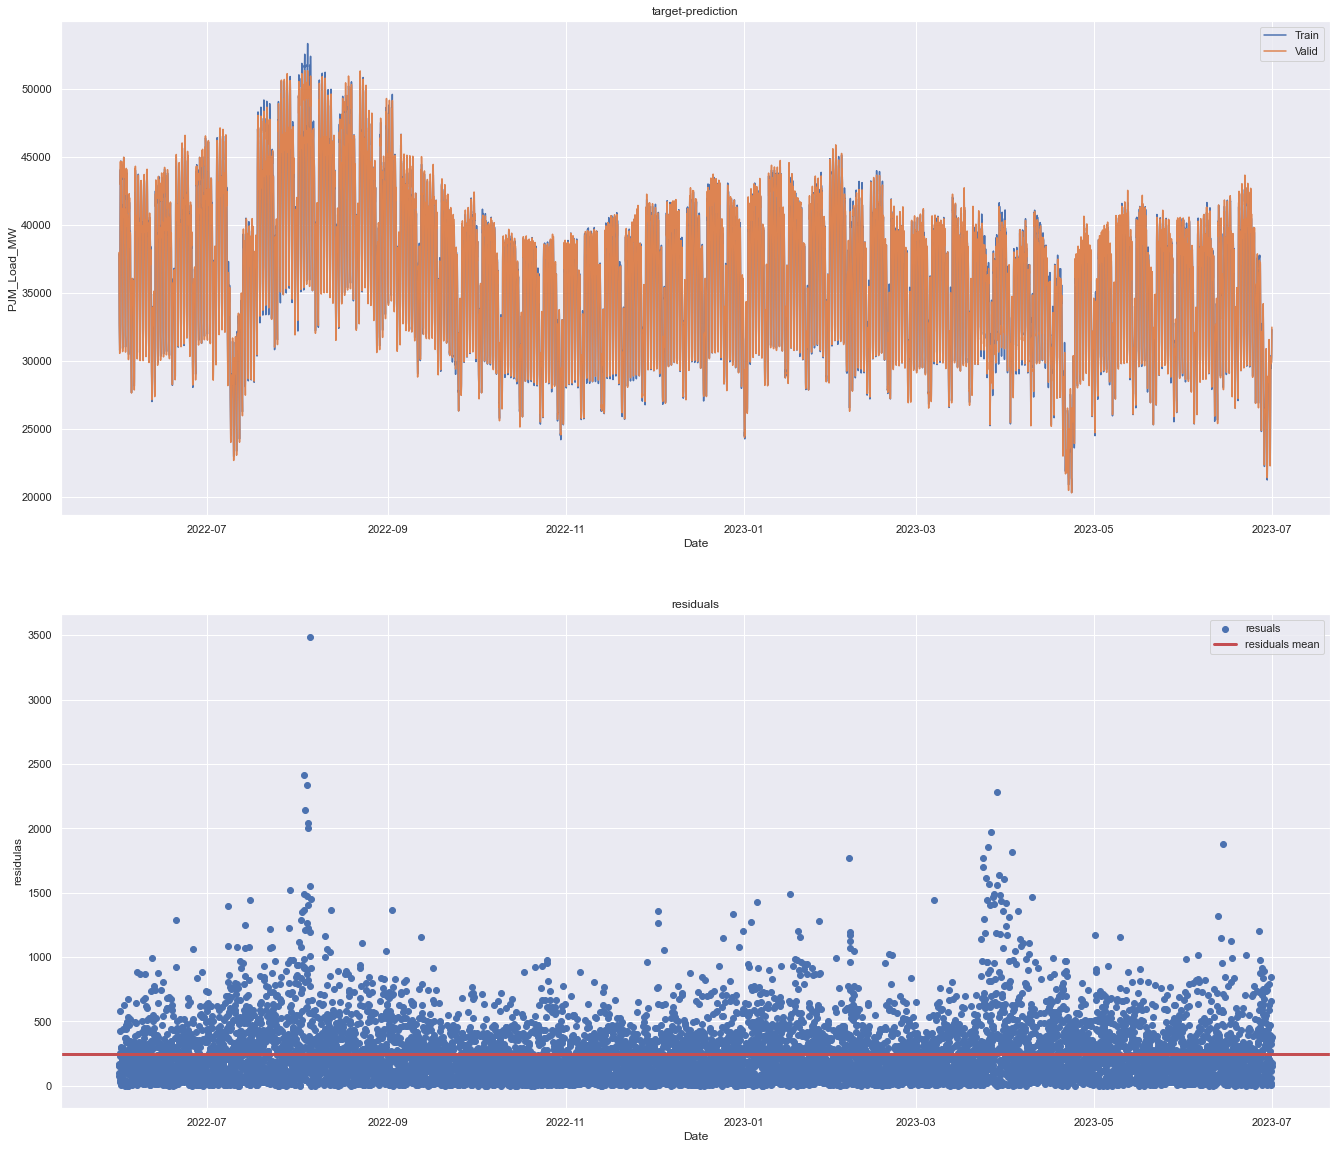

In [236]:
# Genel olarak model yaz aylarında daha büyük hatalar vermiş bunu normal karşılanabilir.
# Outlier diyebileceğimiz aşırı prime time zamanlar genelde yaz aylarında gözlemlendi.Buralarda model hatası yüksek ki bu normal bunları yakalayabilmek için dış kaynak verilerine ihtiyacımız olabilir hava sıcaklığı gibi.


pred_valid=xgb_tuned.predict(data_valid)
df_val=pd.DataFrame(data={'pred_valid':pred_valid,
                          'target_valid':target_valid,
                           'residuals_valid':abs(pred_valid-target_valid)},index=data[-len(data_valid):].index)
plt.figure(figsize=(50,20))
plt.subplot(2,2,1)
plt.title('target-prediction')
plt.plot(df_val.pred_valid, label='Train')
plt.plot(df_val.target_valid, label='Valid')
plt.xlabel('Date')
plt.ylabel('PJM_Load_MW')
plt.legend();
plt.subplot(2,2,3)
plt.title('residuals')
plt.scatter(x=df_val.index,y=df_val.residuals_valid, label='resuals')
plt.axhline(y=df_val.residuals_valid.mean(), color='r', linestyle='-',label='residuals mean',linewidth=3)
plt.xlabel('Date')
plt.ylabel('residulas')
plt.legend();

In [237]:

# Modelin en iyi tahmin yaptığı zamanlar
df_val.sort_values(by='residuals_valid').head(10)


,pred_valid,target_valid,residuals_valid
Datetime,,,
2022-10-04 09:00:00,39196.699219,39196.72,0.020781
2022-10-20 01:00:00,30363.148438,30363.18,0.031563
2023-04-24 10:00:00,36521.500000,36521.45,0.050000
2022-12-01 15:00:00,39390.683594,39390.54,0.143594
2022-07-28 02:00:00,38633.324219,38633.10,0.224219
2023-03-15 10:00:00,40245.097656,40245.37,0.272344
2023-05-05 11:00:00,40055.871094,40055.46,0.411094
2023-06-22 03:00:00,31391.957031,31392.37,0.412969
2022-12-07 04:00:00,29714.408203,29713.99,0.418203


In [238]:

# Modelin en kötü tahmin yaptığı zamanlar
df_val.sort_values(by='residuals_valid',ascending=False).head(10)


,pred_valid,target_valid,residuals_valid
Datetime,,,
2022-08-05 13:00:00,52222.230469,48732.44,3489.790469
2022-08-03 12:00:00,51582.140625,49168.82,2413.320625
2022-08-04 12:00:00,51635.808594,49296.30,2339.508594
2023-03-28 18:00:00,36185.804688,38470.81,2285.005312
2022-08-03 13:00:00,52446.609375,50302.99,2143.619375
2022-08-04 13:00:00,52447.503906,50402.67,2044.833906
2022-08-04 14:00:00,53344.867188,51342.84,2002.027188
2023-03-26 18:00:00,31433.679688,33406.98,1973.300313
2023-06-13 23:00:00,34998.417969,33118.06,1880.357969


In [239]:

# Modelin en onemli featureları
plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [262]:

# Modeli kaydet
with open("xgboost_model.pickle", "wb") as f:
    pickle.dump(xgb_tuned, f)  # Sadece modeli kaydediyoruz

In [288]:
#64 tane olan featurelarin isimlerini yazdiralim
feature_names=data_dum.columns
feature_names


Index(['PJM_Load_MW', 'month', 'dayofweek', 'hour', 'weekday',
       'PJM_Load_MW_shift_2', 'PJM_Load_MW_shift_3', 'PJM_Load_MW_shift_4',
       'PJM_Load_MW_roll', 'PJM_Load_MW_roll_2', 'PJM_Load_MW_roll_3',
       'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'year_2023', 'dayofmonth_2', 'dayofmonth_3', 'dayofmonth_4',
       'dayofmonth_5', 'dayofmonth_6', 'dayofmonth_7', 'dayofmonth_8',
       'dayofmonth_9', 'dayofmonth_10', 'dayofmonth_11', 'dayofmonth_12',
       'dayofmonth_13', 'dayofmonth_14', 'dayofmonth_15', 'dayofmonth_16',
       'dayofmonth_17', 'dayofmonth_18', 'dayofmonth_19', 'dayofmonth_20',
       'dayofmonth_21', 'dayofmonth_22', 'dayofmonth_23', 'dayofmonth_24',
       'dayofmonth_25', 'dayofmonth_26', 'dayofmonth_27', 'dayofmonth_28',
       'dayofmonth_29', 'dayofmonth_30', 'dayofmonth_31', 'wntr_month_1',
       'hour_label_1', 'hour_label_2', 'hour_label_

In [12]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime, timedelta

# Modeli yükle
with open("xgboost_model.pickle", "rb") as f:
    model = pickle.load(f) 

# Tahmin verisi için tarih aralığını belirle
mevcut_zaman_noktasi = datetime.now()
bir_yil_sonrasi = mevcut_zaman_noktasi + timedelta(days=365)

# Tahmin yapılacak zaman aralığını oluştur
tahmin_zamani = pd.date_range(start=mevcut_zaman_noktasi, end=bir_yil_sonrasi, freq='H')

# Tahmin verisi için DataFrame oluştur
tahmin_verisi = pd.DataFrame(index=tahmin_zamani)

tahmin_verisi['PJM_Load_MW'] = np.nan  # Şu an için enerji tüketimi bilgisi olmadığı için NaN değerlerle doldurulabilir
# Model eğitiminde kullanılan özelliklerin listesi
used_features = ['PJM_Load_MW', 'month', 'dayofweek', 'hour', 'weekday',
       'PJM_Load_MW_shift_2', 'PJM_Load_MW_shift_3', 'PJM_Load_MW_shift_4',
       'PJM_Load_MW_roll', 'PJM_Load_MW_roll_2', 'PJM_Load_MW_roll_3',
       'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'year_2023', 'dayofmonth_2', 'dayofmonth_3', 'dayofmonth_4',
       'dayofmonth_5', 'dayofmonth_6', 'dayofmonth_7', 'dayofmonth_8',
       'dayofmonth_9', 'dayofmonth_10', 'dayofmonth_11', 'dayofmonth_12',
       'dayofmonth_13', 'dayofmonth_14', 'dayofmonth_15', 'dayofmonth_16',
       'dayofmonth_17', 'dayofmonth_18', 'dayofmonth_19', 'dayofmonth_20',
       'dayofmonth_21', 'dayofmonth_22', 'dayofmonth_23', 'dayofmonth_24',
       'dayofmonth_25', 'dayofmonth_26', 'dayofmonth_27', 'dayofmonth_28',
       'dayofmonth_29', 'dayofmonth_30', 'dayofmonth_31', 'wntr_month_1',
       'hour_label_1', 'hour_label_2', 'hour_label_3', 'month_label_2',
       'month_label_3', 'quarter_2_çeyrek', 'quarter_3_çeyrek',
       'quarter_4_çeyrek', 'season_kış', 'season_sonbahar', 'season_yaz',
       ]

for feature in used_features:
    tahmin_verisi[feature] = np.nan  # Şu an için tüm özellikler NaN değerlerle doldurulabilir


# 'month', 'dayofweek', 'hour', 'weekday', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos' özelliklerini hesapla
tahmin_verisi['month'] = tahmin_verisi.index.month
tahmin_verisi['dayofweek'] = tahmin_verisi.index.dayofweek
tahmin_verisi['hour'] = tahmin_verisi.index.hour
tahmin_verisi['weekday'] = tahmin_verisi.index.weekday
tahmin_verisi['dayofyear_sin'] = np.sin(2 * np.pi * tahmin_verisi.index.dayofyear / 365)
tahmin_verisi['dayofyear_cos'] = np.cos(2 * np.pi * tahmin_verisi.index.dayofyear / 365)
tahmin_verisi['month_sin'] = np.sin(2 * np.pi * tahmin_verisi.index.month / 12)
tahmin_verisi['month_cos'] = np.cos(2 * np.pi * tahmin_verisi.index.month / 12)

# Tahmini yap
predicted_energy_consumption = model.predict(tahmin_verisi[used_features])

# Sonuçları DataFrame olarak düzenle
sonuclar = pd.DataFrame({'Datetime': tahmin_zamani, 'Tahmin Edilen Enerji Tüketimi (MWh)': predicted_energy_consumption})
print(sonuclar)
# Tahmin edilen enerji tüketimi verilerinin ortalamasını al
ortalama_tuketim_yıl = sonuclar['Tahmin Edilen Enerji Tüketimi (MWh)'].mean()
print("Tahmin Edilen Enerji Tüketimi Ortalaması:", ortalama_tuketim_yıl, "MWh")

                       Datetime  Tahmin Edilen Enerji Tüketimi (MWh)
0    2024-06-10 02:56:34.233072                         34166.125000
1    2024-06-10 03:56:34.233072                         34166.125000
2    2024-06-10 04:56:34.233072                         34166.125000
3    2024-06-10 05:56:34.233072                         34166.125000
4    2024-06-10 06:56:34.233072                         34166.125000
...                         ...                                  ...
8756 2025-06-09 22:56:34.233072                         34174.921875
8757 2025-06-09 23:56:34.233072                         34174.921875
8758 2025-06-10 00:56:34.233072                         39375.906250
8759 2025-06-10 01:56:34.233072                         39380.132812
8760 2025-06-10 02:56:34.233072                         39332.675781

[8761 rows x 2 columns]
Tahmin Edilen Enerji Tüketimi Ortalaması: 44563.1484375 MWh


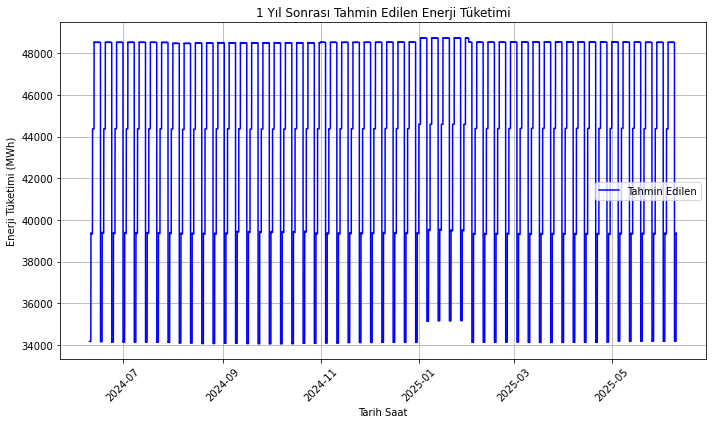

In [13]:
import matplotlib.pyplot as plt

# Grafiği oluştur
plt.figure(figsize=(10, 6))

# Tahmin edilen enerji tüketimini çiz
plt.plot(sonuclar['Datetime'], sonuclar['Tahmin Edilen Enerji Tüketimi (MWh)'], color='blue', label='Tahmin Edilen')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel('Tarih Saat')
plt.ylabel('Enerji Tüketimi (MWh)')
plt.title('1 Yıl Sonrası Tahmin Edilen Enerji Tüketimi')

# Eksenlerin biçimlendirilmesi
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Grafiği göster
plt.legend()
plt.show()


In [15]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime, timedelta

# Modeli yükle
with open("xgboost_model.pickle", "rb") as f:
    model = pickle.load(f) 

# Tahmin verisi için tarih aralığını belirle
mevcut_zaman_noktasi = datetime.now()
bir_ay_sonrasi = mevcut_zaman_noktasi + timedelta(days=30)

# Tahmin yapılacak zaman aralığını oluştur
tahmin_zamani = pd.date_range(start=mevcut_zaman_noktasi, end=bir_ay_sonrasi, freq='H')

# Tahmin verisi için DataFrame oluştur
tahmin_verisi = pd.DataFrame(index=tahmin_zamani)

tahmin_verisi['PJM_Load_MW'] = np.nan  # Şu an için enerji tüketimi bilgisi olmadığı için NaN değerlerle doldurulabilir
# Model eğitiminde kullanılan özelliklerin listesi
used_features = ['PJM_Load_MW', 'month', 'dayofweek', 'hour', 'weekday',
       'PJM_Load_MW_shift_2', 'PJM_Load_MW_shift_3', 'PJM_Load_MW_shift_4',
       'PJM_Load_MW_roll', 'PJM_Load_MW_roll_2', 'PJM_Load_MW_roll_3',
       'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'year_2023', 'dayofmonth_2', 'dayofmonth_3', 'dayofmonth_4',
       'dayofmonth_5', 'dayofmonth_6', 'dayofmonth_7', 'dayofmonth_8',
       'dayofmonth_9', 'dayofmonth_10', 'dayofmonth_11', 'dayofmonth_12',
       'dayofmonth_13', 'dayofmonth_14', 'dayofmonth_15', 'dayofmonth_16',
       'dayofmonth_17', 'dayofmonth_18', 'dayofmonth_19', 'dayofmonth_20',
       'dayofmonth_21', 'dayofmonth_22', 'dayofmonth_23', 'dayofmonth_24',
       'dayofmonth_25', 'dayofmonth_26', 'dayofmonth_27', 'dayofmonth_28',
       'dayofmonth_29', 'dayofmonth_30', 'dayofmonth_31', 'wntr_month_1',
       'hour_label_1', 'hour_label_2', 'hour_label_3', 'month_label_2',
       'month_label_3', 'quarter_2_çeyrek', 'quarter_3_çeyrek',
       'quarter_4_çeyrek', 'season_kış', 'season_sonbahar', 'season_yaz',
       ]

for feature in used_features:
    tahmin_verisi[feature] = np.nan  # Şu an için tüm özellikler NaN değerlerle doldurulabilir


# 'month', 'dayofweek', 'hour', 'weekday', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos' özelliklerini hesapla
tahmin_verisi['month'] = tahmin_verisi.index.month
tahmin_verisi['dayofweek'] = tahmin_verisi.index.dayofweek
tahmin_verisi['hour'] = tahmin_verisi.index.hour
tahmin_verisi['weekday'] = tahmin_verisi.index.weekday
tahmin_verisi['dayofyear_sin'] = np.sin(2 * np.pi * tahmin_verisi.index.dayofyear / 365)
tahmin_verisi['dayofyear_cos'] = np.cos(2 * np.pi * tahmin_verisi.index.dayofyear / 365)
tahmin_verisi['month_sin'] = np.sin(2 * np.pi * tahmin_verisi.index.month / 12)
tahmin_verisi['month_cos'] = np.cos(2 * np.pi * tahmin_verisi.index.month / 12)

# Tahmini yap
predicted_energy_consumption = model.predict(tahmin_verisi[used_features])

# Sonuçları DataFrame olarak düzenle
sonuclar = pd.DataFrame({'Datetime': tahmin_zamani, 'Tahmin Edilen Enerji Tüketimi (MWh)': predicted_energy_consumption})
print(sonuclar)
# Tahmin edilen enerji tüketimi verilerinin ortalamasını al
ortalama_tuketim_ay = sonuclar['Tahmin Edilen Enerji Tüketimi (MWh)'].mean()
print("Tahmin Edilen Enerji Tüketimi Ortalaması:", ortalama_tuketim_ay, "MWh")


                      Datetime  Tahmin Edilen Enerji Tüketimi (MWh)
0   2024-06-10 02:56:52.501365                         34166.125000
1   2024-06-10 03:56:52.501365                         34166.125000
2   2024-06-10 04:56:52.501365                         34166.125000
3   2024-06-10 05:56:52.501365                         34166.125000
4   2024-06-10 06:56:52.501365                         34166.125000
..                         ...                                  ...
716 2024-07-09 22:56:52.501365                         39355.250000
717 2024-07-09 23:56:52.501365                         39355.250000
718 2024-07-10 00:56:52.501365                         44375.144531
719 2024-07-10 01:56:52.501365                         44379.371094
720 2024-07-10 02:56:52.501365                         44375.781250

[721 rows x 2 columns]
Tahmin Edilen Enerji Tüketimi Ortalaması: 44078.3203125 MWh


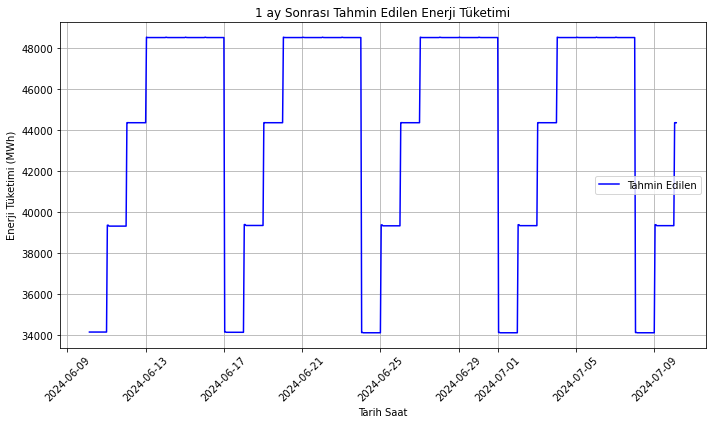

In [16]:
import matplotlib.pyplot as plt

# Grafiği oluştur
plt.figure(figsize=(10, 6))

# Tahmin edilen enerji tüketimini çiz
plt.plot(sonuclar['Datetime'], sonuclar['Tahmin Edilen Enerji Tüketimi (MWh)'], color='blue', label='Tahmin Edilen')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel('Tarih Saat')
plt.ylabel('Enerji Tüketimi (MWh)')
plt.title('1 ay Sonrası Tahmin Edilen Enerji Tüketimi')

# Eksenlerin biçimlendirilmesi
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Grafiği göster
plt.legend()
plt.show()


In [17]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime, timedelta

# Modeli yükle
with open("xgboost_model.pickle", "rb") as f:
    model = pickle.load(f) 

# Tahmin verisi için tarih aralığını belirle
mevcut_zaman_noktasi = datetime.now()
bir_hafta_sonrasi = mevcut_zaman_noktasi + timedelta(days=7)

# Tahmin yapılacak zaman aralığını oluştur
tahmin_zamani = pd.date_range(start=mevcut_zaman_noktasi, end=bir_hafta_sonrasi, freq='H')

# Tahmin verisi için DataFrame oluştur
tahmin_verisi = pd.DataFrame(index=tahmin_zamani)

tahmin_verisi['PJM_Load_MW'] = np.nan  # Şu an için enerji tüketimi bilgisi olmadığı için NaN değerlerle doldurulabilir
# Model eğitiminde kullanılan özelliklerin listesi
used_features = ['PJM_Load_MW', 'month', 'dayofweek', 'hour', 'weekday',
       'PJM_Load_MW_shift_2', 'PJM_Load_MW_shift_3', 'PJM_Load_MW_shift_4',
       'PJM_Load_MW_roll', 'PJM_Load_MW_roll_2', 'PJM_Load_MW_roll_3',
       'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'year_2023', 'dayofmonth_2', 'dayofmonth_3', 'dayofmonth_4',
       'dayofmonth_5', 'dayofmonth_6', 'dayofmonth_7', 'dayofmonth_8',
       'dayofmonth_9', 'dayofmonth_10', 'dayofmonth_11', 'dayofmonth_12',
       'dayofmonth_13', 'dayofmonth_14', 'dayofmonth_15', 'dayofmonth_16',
       'dayofmonth_17', 'dayofmonth_18', 'dayofmonth_19', 'dayofmonth_20',
       'dayofmonth_21', 'dayofmonth_22', 'dayofmonth_23', 'dayofmonth_24',
       'dayofmonth_25', 'dayofmonth_26', 'dayofmonth_27', 'dayofmonth_28',
       'dayofmonth_29', 'dayofmonth_30', 'dayofmonth_31', 'wntr_month_1',
       'hour_label_1', 'hour_label_2', 'hour_label_3', 'month_label_2',
       'month_label_3', 'quarter_2_çeyrek', 'quarter_3_çeyrek',
       'quarter_4_çeyrek', 'season_kış', 'season_sonbahar', 'season_yaz',
       ]

for feature in used_features:
    tahmin_verisi[feature] = np.nan  # Şu an için tüm özellikler NaN değerlerle doldurulabilir


# 'month', 'dayofweek', 'hour', 'weekday', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos' özelliklerini hesapla
tahmin_verisi['month'] = tahmin_verisi.index.month
tahmin_verisi['dayofweek'] = tahmin_verisi.index.dayofweek
tahmin_verisi['hour'] = tahmin_verisi.index.hour
tahmin_verisi['weekday'] = tahmin_verisi.index.weekday
tahmin_verisi['dayofyear_sin'] = np.sin(2 * np.pi * tahmin_verisi.index.dayofyear / 365)
tahmin_verisi['dayofyear_cos'] = np.cos(2 * np.pi * tahmin_verisi.index.dayofyear / 365)
tahmin_verisi['month_sin'] = np.sin(2 * np.pi * tahmin_verisi.index.month / 12)
tahmin_verisi['month_cos'] = np.cos(2 * np.pi * tahmin_verisi.index.month / 12)

# Tahmini yap
predicted_energy_consumption = model.predict(tahmin_verisi[used_features])

# Sonuçları DataFrame olarak düzenle
sonuclar = pd.DataFrame({'Datetime': tahmin_zamani, 'Tahmin Edilen Enerji Tüketimi (MWh)': predicted_energy_consumption})
print(sonuclar)
# Tahmin edilen enerji tüketimi verilerinin ortalamasını al
ortalama_tuketim_hafta = sonuclar['Tahmin Edilen Enerji Tüketimi (MWh)'].mean()
print("Tahmin Edilen Enerji Tüketimi Ortalaması:", ortalama_tuketim_hafta, "MWh")


                      Datetime  Tahmin Edilen Enerji Tüketimi (MWh)
0   2024-06-10 02:56:59.464606                         34166.125000
1   2024-06-10 03:56:59.464606                         34166.125000
2   2024-06-10 04:56:59.464606                         34166.125000
3   2024-06-10 05:56:59.464606                         34166.125000
4   2024-06-10 06:56:59.464606                         34166.125000
..                         ...                                  ...
164 2024-06-16 22:56:59.464606                         48529.363281
165 2024-06-16 23:56:59.464606                         48529.363281
166 2024-06-17 00:56:59.464606                         34162.167969
167 2024-06-17 01:56:59.464606                         34169.917969
168 2024-06-17 02:56:59.464606                         34154.218750

[169 rows x 2 columns]
Tahmin Edilen Enerji Tüketimi Ortalaması: 44509.75 MWh


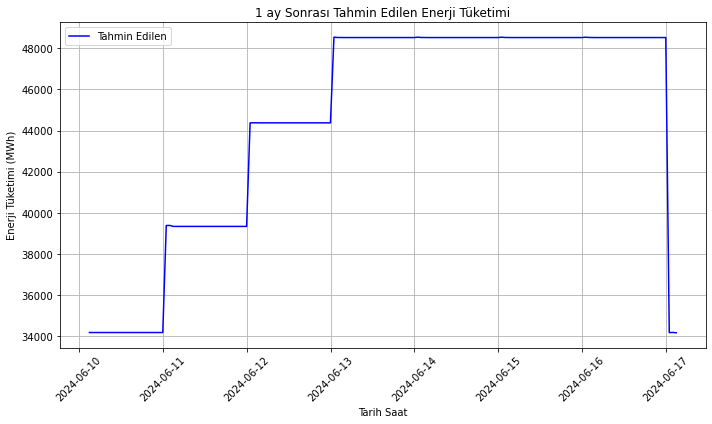

In [18]:
import matplotlib.pyplot as plt

# Grafiği oluştur
plt.figure(figsize=(10, 6))

# Tahmin edilen enerji tüketimini çiz
plt.plot(sonuclar['Datetime'], sonuclar['Tahmin Edilen Enerji Tüketimi (MWh)'], color='blue', label='Tahmin Edilen')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel('Tarih Saat')
plt.ylabel('Enerji Tüketimi (MWh)')
plt.title('1 ay Sonrası Tahmin Edilen Enerji Tüketimi')

# Eksenlerin biçimlendirilmesi
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Grafiği göster
plt.legend()
plt.show()

In [20]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout, QDateTimeEdit, QLabel
import pandas as pd
import numpy as np
import pickle
from datetime import datetime, timedelta

# Modeli yükle
with open("xgboost_model.pickle", "rb") as f:
    model = pickle.load(f) 

class ElectricityPredictionApp(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('Enerji Tüketimi Tahmini')
        self.resize(500, 300)
        
        self.dateTimeEdit = QDateTimeEdit(self)
        self.dateTimeEdit.setDateTime(datetime.now())
        
        self.predictButton = QPushButton('Tahmin Et', self)
        self.predictButton.clicked.connect(self.predictElectricityConsumption)
        self.predictButton.setStyleSheet("background-color: #FFA500; color: #2C3E50;")
        

        
        self.resultLabelYear = QLabel("Tahmin Edilen Enerji Tüketimi (1 Yıl Sonrası)", self)
        self.resultLabelMonth = QLabel("Tahmin Edilen Enerji Tüketimi (1 Ay Sonrası)", self)
        self.resultLabelWeek = QLabel("Tahmin Edilen Enerji Tüketimi (1 Hafta Sonrası)", self)
        self.resultLabelYear.setStyleSheet("color: #2C3E50;")  # Koyu gri metin rengi
        self.resultLabelMonth.setStyleSheet("color: #2C3E50;")  # Koyu gri metin rengi
        self.resultLabelWeek.setStyleSheet("color: #2C3E50;")  # Koyu gri metin rengi
        
        self.resultLabelYearValue = QLabel(self)
        self.resultLabelMonthValue = QLabel(self)
        self.resultLabelWeekValue = QLabel(self)
        self.resultLabelYearValue.setStyleSheet("color: #2C3E50;")  # Koyu gri metin rengi
        self.resultLabelMonthValue.setStyleSheet("color: #2C3E50;")  # Koyu gri metin rengi
        self.resultLabelWeekValue.setStyleSheet("color: #2C3E50;")  # Koyu gri metin rengi

        layout = QVBoxLayout()
        layout.addWidget(self.dateTimeEdit)
        layout.addWidget(self.predictButton)
        layout.addWidget(self.resultLabelYear)
        layout.addWidget(self.resultLabelYearValue)
        layout.addWidget(self.resultLabelMonth)
        layout.addWidget(self.resultLabelMonthValue)
        layout.addWidget(self.resultLabelWeek)
        layout.addWidget(self.resultLabelWeekValue)
        
        self.setLayout(layout)
        
    def predictElectricityConsumption(self):
        selectedDateTime = self.dateTimeEdit.dateTime().toPyDateTime()
        
        # Tahmin verisi için DataFrame oluştur
        tahmin_verisi_year = pd.DataFrame(index=[selectedDateTime + timedelta(days=365)])
        tahmin_verisi_month = pd.DataFrame(index=[selectedDateTime + timedelta(days=30)])
        tahmin_verisi_week = pd.DataFrame(index=[selectedDateTime + timedelta(days=7)])

        tahmin_verisi_year['PJM_Load_MW'] = np.nan  # Şu an için enerji tüketimi bilgisi olmadığı için NaN değerlerle doldurulabilir
        tahmin_verisi_month['PJM_Load_MW'] = np.nan
        tahmin_verisi_week['PJM_Load_MW'] = np.nan
        
        # Model eğitiminde kullanılan özelliklerin listesi
        used_features = ['PJM_Load_MW', 'month', 'dayofweek', 'hour', 'weekday',
               'PJM_Load_MW_shift_2', 'PJM_Load_MW_shift_3', 'PJM_Load_MW_shift_4',
               'PJM_Load_MW_roll', 'PJM_Load_MW_roll_2', 'PJM_Load_MW_roll_3',
               'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos', 'year_2017',
               'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
               'year_2023', 'dayofmonth_2', 'dayofmonth_3', 'dayofmonth_4',
               'dayofmonth_5', 'dayofmonth_6', 'dayofmonth_7', 'dayofmonth_8',
               'dayofmonth_9', 'dayofmonth_10', 'dayofmonth_11', 'dayofmonth_12',
               'dayofmonth_13', 'dayofmonth_14', 'dayofmonth_15', 'dayofmonth_16',
               'dayofmonth_17', 'dayofmonth_18', 'dayofmonth_19', 'dayofmonth_20',
               'dayofmonth_21', 'dayofmonth_22', 'dayofmonth_23', 'dayofmonth_24',
               'dayofmonth_25', 'dayofmonth_26', 'dayofmonth_27', 'dayofmonth_28',
               'dayofmonth_29', 'dayofmonth_30', 'dayofmonth_31', 'wntr_month_1',
               'hour_label_1', 'hour_label_2', 'hour_label_3', 'month_label_2',
               'month_label_3', 'quarter_2_çeyrek', 'quarter_3_çeyrek',
               'quarter_4_çeyrek', 'season_kış', 'season_sonbahar', 'season_yaz',
               ]

        for feature in used_features:
            tahmin_verisi_year[feature] = np.nan  # Şu an için tüm özellikler NaN değerlerle doldurulabilir
            tahmin_verisi_month[feature] = np.nan
            tahmin_verisi_week[feature] = np.nan

        # 'month', 'dayofweek', 'hour', 'weekday', 'dayofyear_sin', 'dayofyear_cos', 'month_sin', 'month_cos' özelliklerini hesapla
        tahmin_verisi_year['month'] = tahmin_verisi_year.index.month
        tahmin_verisi_year['dayofweek'] = tahmin_verisi_year.index.dayofweek
        tahmin_verisi_year['hour'] = tahmin_verisi_year.index.hour
        tahmin_verisi_year['weekday'] = tahmin_verisi_year.index.weekday
        tahmin_verisi_year['dayofyear_sin'] = np.sin(2 * np.pi * tahmin_verisi_year.index.dayofyear / 365)
        tahmin_verisi_year['dayofyear_cos'] = np.cos(2 * np.pi * tahmin_verisi_year.index.dayofyear / 365)
        tahmin_verisi_year['month_sin'] = np.sin(2 * np.pi * tahmin_verisi_year.index.month / 12)
        tahmin_verisi_year['month_cos'] = np.cos(2 * np.pi * tahmin_verisi_year.index.month / 12)
        
        tahmin_verisi_month['month'] = tahmin_verisi_month.index.month
        tahmin_verisi_month['dayofweek'] = tahmin_verisi_month.index.dayofweek
        tahmin_verisi_month['hour'] = tahmin_verisi_month.index.hour
        tahmin_verisi_month['weekday'] = tahmin_verisi_month.index.weekday
        tahmin_verisi_month['dayofyear_sin'] = np.sin(2 * np.pi * tahmin_verisi_month.index.dayofyear / 365)
        tahmin_verisi_month['dayofyear_cos'] = np.cos(2 * np.pi * tahmin_verisi_month.index.dayofyear / 365)
        tahmin_verisi_month['month_sin'] = np.sin(2 * np.pi * tahmin_verisi_month.index.month / 12)
        tahmin_verisi_month['month_cos'] = np.cos(2 * np.pi * tahmin_verisi_month.index.month / 12)
        
        tahmin_verisi_week['month'] = tahmin_verisi_week.index.month
        tahmin_verisi_week['dayofweek'] = tahmin_verisi_week.index.dayofweek
        tahmin_verisi_week['hour'] = tahmin_verisi_week.index.hour
        tahmin_verisi_week['weekday'] = tahmin_verisi_week.index.weekday
        tahmin_verisi_week['dayofyear_sin'] = np.sin(2 * np.pi * tahmin_verisi_week.index.dayofyear / 365)
        tahmin_verisi_week['dayofyear_cos'] = np.cos(2 * np.pi * tahmin_verisi_week.index.dayofyear / 365)
        tahmin_verisi_week['month_sin'] = np.sin(2 * np.pi * tahmin_verisi_week.index.month / 12)
        tahmin_verisi_week['month_cos'] = np.cos(2 * np.pi * tahmin_verisi_week.index.month / 12)

        # Tahmini yap
        predicted_energy_consumption_year = model.predict(tahmin_verisi_year[used_features])
        predicted_energy_consumption_month = model.predict(tahmin_verisi_month[used_features])
        predicted_energy_consumption_week = model.predict(tahmin_verisi_week[used_features])

        self.resultLabelYearValue.setText(f"{predicted_energy_consumption_year[0]:.2f} MWh")
        self.resultLabelMonthValue.setText(f"{predicted_energy_consumption_month[0]:.2f} MWh")
        self.resultLabelWeekValue.setText(f"{predicted_energy_consumption_week[0]:.2f} MWh")

def main():
    app = QApplication(sys.argv)
    window = ElectricityPredictionApp()
    window.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()


SystemExit: 0

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
